In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
from itertools import combinations

plt.rcParams['figure.figsize'] = [16, 4]
from plot_utils import *

In [2]:
def plot_one_result_pval_var(ax,plot_item_list,ate_noise,run_list,pval_list,main_enum,noise,reg_fname_pattern,erm_fname_pattern,pvalt0=None,pvalt1=None,clambda=None,telambda=None,t0ate=None,t1ate=None,hwidth=None,label_prefix=""):
    #Getting the result dict
    if clambda!=None:
        if t0ate!=None and hwidth!=None:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              t0ate,
                                                                              t1ate,
                                                                              ate_noise,
                                                                              clambda,
                                                                              hwidth,
                                      )
                    )
        elif t0ate!=None and hwidth==None:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              t0ate,
                                                                              t1ate,
                                                                              ate_noise,
                                                                              clambda,
                                      )
                    )
        else:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=reg_fname_pattern.format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              pvalt1,
                                                                              ate_noise,
                                                                              clambda,
                                      )
                    )
    else:
        #This is not being used now. We directly pass the fname and telambda inside the clambda
        result_dict = get_all_result_dict(run_list=run_list,
                                      pval_list=pval_list,
                                      enum=main_enum,
                                      fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          ate_noise,
                                                                          telambda,
                                  )
                )
    
    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=erm_fname_pattern.format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          pvalt1,
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [result_dict[pval][plot_item]["mean"] for pval in pval_list]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label=label_prefix+"ate_noise={}".format(ate_noise),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [3]:
def plot_one_result_ate_pval_pair(ax,plot_item_list,ate_noise_list,run_list,pval_list,main_enum,noise,reg_fname_pattern,erm_fname_pattern,pvalt0=None,pvalt1=None,clambda=None,telambda=None,t0ate=None,t1ate=None):
    #Getting the result dict
    #Getting the result dict for all the ate noise also
    all_result_dict=defaultdict(dict)
    for ate_noise in ate_noise_list:
        if clambda!=None:
            if t0ate!=None:
                result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=main_enum,
                                              fname_pattern=reg_fname_pattern.format(
                                                                                  "{1}",
                                                                                  noise,
                                                                                  "{0}",
                                                                                  pvalt1,
                                                                                  t0ate,
                                                                                  t1ate,
                                                                                  ate_noise,
                                                                                  clambda,
                                          )
                        )
                all_result_dict[ate_noise]=result_dict
            else:
                result_dict = get_all_result_dict(run_list=run_list,
                                              pval_list=pval_list,
                                              enum=main_enum,
                                              fname_pattern=reg_fname_pattern.format(
                                                                                  "{1}",
                                                                                  noise,
                                                                                  "{0}",
                                                                                  pvalt1,
                                                                                  ate_noise,
                                                                                  clambda,
                                          )
                        )
                all_result_dict[ate_noise]=result_dict
        else:
            result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern="dataset/nlp_toy2/nlp_logs/cad.s2.rnum({}).noise({}).pval({}).ate_noise({}).telambda({})/probe_metric_list.json".format(
                                                                              "{1}",
                                                                              noise,
                                                                              "{0}",
                                                                              ate_noise,
                                                                              telambda,
                                      )
                    )

    #Add the erm curve
    erm_result_dict = get_all_result_dict(run_list=run_list,
                                          pval_list=pval_list,
                                          enum=main_enum,
                                          fname_pattern=erm_fname_pattern.format(
                                                                          "{1}",
                                                                          noise,
                                                                          "{0}",
                                                                          pvalt1,
                                  )
    
    )
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        _, labels = ax[pidx].get_legend_handles_labels()
        if "erm" not in labels:
            erm_item_yval=[erm_result_dict[pval][plot_item]["mean"] for pval in pval_list]
            yerr=[0.0]*len(erm_item_yval)
            #Plotting the item
            ax[pidx].errorbar(pval_list,erm_item_yval,yerr,label="erm",ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
           
        
            
        #Getting the value for this item
        item_yval = [all_result_dict[ate_noise][pval][plot_item]["mean"] for ate_noise,pval in zip(ate_noise_list,pval_list)]
        yerr=[0.0]*len(item_yval)
        #Plotting the item
        ax[pidx].errorbar(pval_list,item_yval,yerr,label="ate_noise={}".format("stage1"),ls="-.",marker="o",alpha=0.7)
        #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
        
        
        
        
        ax[pidx].set_xlabel("predictive-correlation")
        ax[pidx].set_ylabel(plot_item)
        
        if "pdelta" not in plot_item:
            ax[pidx].set_ylim(0.0,1.1)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [4]:
def plot_one_result_timeline(ax,plot_item_list,run_list,pval_list,ate_list,fname_pattern,tidx,title,epoch_upto=None,plot_upto=-1,num_topics=1,no_plot_mode=False,print_best_result=True):
    #Getting the timeline
    result_dict_timeline = get_all_result_timeline_stage2(
                                            run_list= run_list,
                                            pval_list=pval_list,
                                            ate_list = ate_list,
                                            fname_pattern=fname_pattern,
                                            epoch_upto=epoch_upto,
    )
#     print(result_dict_timeline)
    best_result_pval_var = {}
    for pval in pval_list:
        best_result_pval_var[pval] = get_best_interation_indo_ood(result_dict_timeline,num_topics,plot_upto,pval,print_best_result)
        
    if no_plot_mode==True:
#         print(fname_pattern)
        return best_result_pval_var
            
    
#     print(result_dict_timeline)
    
    #Plotting each of the plot item
    for pidx,plot_item in enumerate(plot_item_list):
        #Getting the erm value
        
        #Getting the timeline item
        for pval in pval_list:
            item_pval_yval_timeline = result_dict_timeline[pval][plot_item]["mean"][0:plot_upto]
            yerr= result_dict_timeline[pval][plot_item]["std"][0:plot_upto]
            xval = range(len(item_pval_yval_timeline))

            #Plotting the item
            ax[pidx,tidx].errorbar(xval,item_pval_yval_timeline,yerr,label="{}+pval={}".format(title,pval),ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)
            
            ax[pidx,tidx].set_xlabel("epoch")
            ax[pidx,tidx].set_ylabel(plot_item)
            
            if "pdelta" in plot_item:
                ax[pidx,tidx].set_ylim(0,0.75)
            elif "te_loss" in plot_item:
                pass
            else:
                ax[pidx,tidx].set_ylim(0.0,1.09)
        
#             if "pdelta" not in plot_item or "loss" not in plot_item or "norm" not in plot_item:
#                 ax[pidx,0].set_ylim(0.0,1.1)
            
#             if "pdelta" in plot_item or "smin" in plot_item:
#                 pass
#             else:
            ax[pidx,tidx].legend()
            ax[pidx,tidx].grid(True)
            ax[pidx,tidx].set_title(title)
        
#         if plot_item=="emb_norm":
#             continue
    
    return best_result_pval_var

In [5]:
def get_best_interation_indo_ood(result_dict_timeline,num_topics,num_epoch,pval,print_best_result):
    #Getting the number of iteration
#     num_epoch = result_dict_timeline["inf"]["acc:main"]["mean"]
    
    #Going over the iteration and selecting the best iteation based on mean indo and ood
    indo = result_dict_timeline[pval]["topic0_smaj"]["mean"][0:num_epoch]
    indo_val_mat = result_dict_timeline[pval]["topic0_smaj"]["val_mat"][:,0:num_epoch]
    indo_std = result_dict_timeline[pval]["topic0_smaj"]["std"][0:num_epoch]
    
    #If we want to use the overall accuracy instead of majority group.
#     indo = result_dict_timeline[pval]["acc:main"]["mean"][0:num_epoch]
#     indo_val_mat = result_dict_timeline[pval]["acc:main"]["val_mat"][:,0:num_epoch]
#     indo_std = result_dict_timeline[pval]["acc:main"]["std"][0:num_epoch]
    
    acc_sum = indo_val_mat.copy()
    for tidx in range(num_topics):
        ood_val_mat = result_dict_timeline[pval]["topic{}_smin".format(tidx)]["val_mat"][:,0:num_epoch]
        acc_sum += ood_val_mat
    acc_sum_mean = acc_sum/(num_topics+1)
    crit = np.mean(acc_sum_mean,axis=0)
    crit_std = np.std(acc_sum_mean,axis=0)
    #Getting the max position and the guy
    best_loc = np.argmax(crit)
    
    
    #Initializing the best result dict
    result_dict={}
    result_dict["overall"]=crit[best_loc]
    result_dict["overall_std"]=crit_std[best_loc]
    result_dict["indo"]=indo[best_loc]
    result_dict["indo_std"]=indo_std[best_loc]
    
    if print_best_result:
        print("=============================================")
        print("Getting the best setting for pval:{}".format(pval))    
        print("\n\nbest loc :",best_loc)
        print("overall_avg_acc: ",np.around(result_dict["overall"],decimals=2))
        print("best indo:",np.around(result_dict["indo"],decimals=2))
    for tidx in range(num_topics):
        ood = result_dict_timeline[pval]["topic{}_smin".format(tidx)]["mean"][0:num_epoch]
        ood_std = result_dict_timeline[pval]["topic{}_smin".format(tidx)]["std"][0:num_epoch]
        topic_pdelta = result_dict_timeline[pval]["topic{}_pdelta_all".format(tidx)]["mean"][0:num_epoch]
        topic_pdelta_std = result_dict_timeline[pval]["topic{}_pdelta_all".format(tidx)]["std"][0:num_epoch]
        result_dict["ood{}".format(tidx)]=ood[best_loc]
        result_dict["ood{}_std".format(tidx)]=ood_std[best_loc]
        result_dict["topic{}_pdelta_all".format(tidx)]=topic_pdelta[best_loc]
        result_dict["topic{}_pdelta_all_std".format(tidx)]=topic_pdelta_std[best_loc]
        if print_best_result:
            print("best ood{} :".format(tidx),np.around(result_dict["ood{}".format(tidx)],decimals=2))
    
    return result_dict

In [6]:
def plot_ateval_performance_spectrum(num_cols,pval_list,mouli_pval_best_result,erm_pval_best_result,atereg_pval_best_result,ate_list_dict=None,hpname="telambda",savename=None,plot_mouli=True):
    
    #Setting up the matplotlib params
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15) 
    plt.rcParams.update({'font.size': 10})
    plt.rcParams['figure.figsize'] = [8*(num_cols+1), 7*len(pval_list)]
    fig,ax = plt.subplots(len(pval_list),num_cols+1)
    
    
    
    
    
    alpha=0.6
    alpha_mouli=0.0

    for telambda in atereg_pval_best_result.keys():
        #Plotting each of the variation for the pval
        for pidx,pval in enumerate(pval_list):
            #Plotting the indo for the erm
            _, labels = ax[pidx,0].get_legend_handles_labels()
            if "erm" not in " ".join(labels):
                erm_best_indo = np.array([erm_pval_best_result[pval]["indo"]]*len(ate_sweep_list))
                erm_best_indo_std = np.array([erm_pval_best_result[pval]["indo_std"]]*len(ate_sweep_list))
                ax[pidx,0].plot(ate_sweep_list,erm_best_indo,ls="-.",marker="o",alpha=alpha,label="indo_erm")
                ax[pidx,0].fill_between(ate_sweep_list,erm_best_indo-erm_best_indo_std,erm_best_indo+erm_best_indo_std,alpha=0.2)
            
            #Plotting the indo for mouli
            if plot_mouli and "mouli" not in " ".join(labels):
                mouli_best_indo = np.array([mouli_pval_best_result[pval]["indo"]]*len(ate_sweep_list))
                mouli_best_indo_std = np.array([mouli_pval_best_result[pval]["indo_std"]]*len(ate_sweep_list))
                ax[pidx,0].plot(ate_sweep_list,mouli_best_indo,ls="-.",marker="o",alpha=alpha,label="indo_mouli")
                ax[pidx,0].fill_between(ate_sweep_list,mouli_best_indo-mouli_best_indo_std,mouli_best_indo+mouli_best_indo_std,alpha=alpha_mouli)

            #Creating the varation of best indo and ood acc for each of the ate val
            atereg_best_indo = np.array([atereg_pval_best_result[telambda][ate_val][pval]["indo"] for ate_val in ate_sweep_list])
            atereg_best_indo_std = np.array([atereg_pval_best_result[telambda][ate_val][pval]["indo_std"] for ate_val in ate_sweep_list])
            ax[pidx,0].plot(ate_sweep_list,atereg_best_indo,ls="-.",marker="o",alpha=alpha,label="indo_atereg_telambd={}".format(telambda))
            ax[pidx,0].fill_between(ate_sweep_list,atereg_best_indo-atereg_best_indo_std,atereg_best_indo+atereg_best_indo_std,alpha=0.2)

                
            if plot_mouli:
                yllim=min(erm_best_indo.min(),atereg_best_indo.min(),mouli_best_indo.min())-0.1
                yulim=max(erm_best_indo.max(),atereg_best_indo.max(),mouli_best_indo.max())+0.1
            else:
                yllim=min(erm_best_indo.min(),atereg_best_indo.min())-0.1
                yulim=max(erm_best_indo.max(),atereg_best_indo.max())+0.1
                
            #Marking the location of diffrent ate estimates
            if ate_list_dict!=None:
                for ate_name, ate_list in ate_list_dict.items():
                    yval_line = np.arange(yllim,yulim,0.001)
                    xval_mark = [ate_list[pidx]]*yval_line.shape[0]

                    #Marking the ate as the vertical line
            #         ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
                    ax[pidx,0].plot(xval_mark,yval_line,ls="-",color="k",alpha=0.8)

            ax[pidx,0].set_title("Predicitve Correlation($\kappa$)={},indo_accuracy".format(pval))
            ax[pidx,0].set_xlabel("ate_value")
            ax[pidx,0].legend()
            ax[pidx,0].grid(True)
            #     ax[pidx,0].set_ylim(0.5,0.9)

            
            
            #Adding the pdelta curves
            for tidx in range(0,num_cols-1,2):
                #Plotting the ondo for the erm
                _, labels = ax[pidx,tidx+1].get_legend_handles_labels()
                if "erm" not in " ".join(labels):
                    erm_best_ood = np.array([erm_pval_best_result[pval]["ood{}".format((tidx)//2)]]*len(ate_sweep_list))
                    erm_best_ood_std = np.array([erm_pval_best_result[pval]["ood{}_std".format((tidx)//2)]]*len(ate_sweep_list))
                    ax[pidx,tidx+1].plot(ate_sweep_list,erm_best_ood,ls="-.",marker="o",alpha=alpha,label="ood_erm")
                    ax[pidx,tidx+1].fill_between(ate_sweep_list,erm_best_ood-erm_best_ood_std,erm_best_ood+erm_best_ood_std,alpha=0.2)
                
                if plot_mouli and "mouli" not in " ".join(labels):
                    mouli_best_ood = np.array([mouli_pval_best_result[pval]["ood{}".format((tidx)//2)]]*len(ate_sweep_list))
                    mouli_best_ood_std = np.array([mouli_pval_best_result[pval]["ood{}_std".format((tidx)//2)]]*len(ate_sweep_list))
                    ax[pidx,tidx+1].plot(ate_sweep_list,mouli_best_ood,ls="-.",marker="o",alpha=alpha,label="ood_mouli")
                    ax[pidx,tidx+1].fill_between(ate_sweep_list,mouli_best_ood-mouli_best_ood_std,mouli_best_ood+mouli_best_ood_std,alpha=alpha_mouli)

                #Creating the varation of best indo and ood acc for each of the ate val
                atereg_best_ood = np.array([atereg_pval_best_result[telambda][ate_val][pval]["ood{}".format((tidx)//2)] for ate_val in ate_sweep_list])
                atereg_best_ood_std = np.array([atereg_pval_best_result[telambda][ate_val][pval]["ood{}_std".format((tidx)//2)] for ate_val in ate_sweep_list])
                ax[pidx,tidx+1].plot(ate_sweep_list,atereg_best_ood,ls="-.",marker="o",alpha=alpha,label="ood_atereg_{}={}".format(hpname,telambda))
                ax[pidx,tidx+1].fill_between(ate_sweep_list,atereg_best_ood-atereg_best_ood_std,atereg_best_ood+atereg_best_ood_std,alpha=0.2)

                if plot_mouli:
                    yllim=min(erm_best_ood.min(),atereg_best_ood.min(),mouli_best_ood.min())-0.1
                    yulim=max(erm_best_ood.max(),atereg_best_ood.max(),mouli_best_ood.max())+0.1
                else:
                    yllim=min(erm_best_ood.min(),atereg_best_ood.min())-0.1
                    yulim=max(erm_best_ood.max(),atereg_best_ood.max())+0.1

                if ate_list_dict!=None:
                    #Marking the location of diffrent ate estimates
                    for ate_name, ate_list in ate_list_dict.items():
                        yval_line = np.arange(yllim,yulim,0.01)
                        xval_mark = [ate_list[pidx]]*yval_line.shape[0]

                        #Marking the ate as the vertical line
                        ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-",color="k",alpha=0.8)
            #             ax[pidx,0].plot(xval_mark,yval_line,ls="-.",label=ate_name)

                ax[pidx,tidx+1].set_title("Predicitve Correlation($\kappa$)={},ood{}_accuracy".format(pval,(tidx)//2))
                ax[pidx,tidx+1].set_xlabel("ate_value")
                ax[pidx,tidx+1].legend()
                ax[pidx,tidx+1].grid(True)
            #         ax[pidx,tidx+1].set_ylim(yllim,yulim)

                #Addign thhe plot for pdelta for the erm
                _, labels = ax[pidx,tidx+2].get_legend_handles_labels()
                if "erm" not in " ".join(labels):
                    topic_pdelta_ermvar = np.array([erm_pval_best_result[pval]["topic{}_pdelta_all".format(tidx//2)]]*len(ate_sweep_list))
                    topic_pdelta_ermvar_std = np.array([erm_pval_best_result[pval]["topic{}_pdelta_all_std".format(tidx//2)]]*len(ate_sweep_list))
                    ax[pidx,tidx+2].fill_between(ate_sweep_list,topic_pdelta_ermvar-topic_pdelta_ermvar_std,topic_pdelta_ermvar+topic_pdelta_ermvar_std,alpha=0.2)
                    ax[pidx,tidx+2].plot(ate_sweep_list,topic_pdelta_ermvar,ls="-.",marker="o",alpha=alpha,label="erm_pdelta")
                
                if plot_mouli and "mouli" not in " ".join(labels):
                    topic_pdelta_moulivar = np.array([mouli_pval_best_result[pval]["topic{}_pdelta_all".format(tidx//2)]]*len(ate_sweep_list))
                    topic_pdelta_moulivar_std = np.array([mouli_pval_best_result[pval]["topic{}_pdelta_all_std".format(tidx//2)]]*len(ate_sweep_list))
                    ax[pidx,tidx+2].plot(ate_sweep_list,topic_pdelta_moulivar,ls="-.",marker="o",alpha=alpha,label="mouli_pdelta")
                    ax[pidx,tidx+2].fill_between(ate_sweep_list,topic_pdelta_moulivar-topic_pdelta_moulivar_std,topic_pdelta_moulivar+topic_pdelta_moulivar_std,alpha=alpha_mouli)
                    


                #Adding the pdelta plot for the regulaized models
                topic_pdelta_atevar = np.array([atereg_pval_best_result[telambda][ate_val][pval]["topic{}_pdelta_all".format(tidx//2)] for ate_val in ate_sweep_list])
                topic_pdelta_atevar_std = np.array([atereg_pval_best_result[telambda][ate_val][pval]["topic{}_pdelta_all_std".format(tidx//2)] for ate_val in ate_sweep_list])
                ax[pidx,tidx+2].fill_between(ate_sweep_list,topic_pdelta_atevar-topic_pdelta_atevar_std,topic_pdelta_atevar+topic_pdelta_atevar_std,alpha=0.2)
                ax[pidx,tidx+2].plot(ate_sweep_list,topic_pdelta_atevar,ls="-.",marker="o",alpha=alpha,label="atereg_pdelta_{}={}".format(hpname,telambda))


                ax[pidx,tidx+2].set_title("Predicitve Correlation($\kappa$)={},topic_pdelta".format(pval,(tidx)//2))
                ax[pidx,tidx+2].set_xlabel("ate_value")
                ax[pidx,tidx+2].legend()
                ax[pidx,tidx+2].grid(True)
            
            
            
            
            #Plotting the overall score
            if "erm" not in " ".join(labels):
                erm_best_overall = np.array([erm_pval_best_result[pval]["overall"]]*len(ate_sweep_list))
                erm_best_overall_std = np.array([erm_pval_best_result[pval]["overall_std"]]*len(ate_sweep_list))
                ax[pidx,num_cols].plot(ate_sweep_list,erm_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_erm")
                ax[pidx,num_cols].fill_between(ate_sweep_list,erm_best_overall-erm_best_overall_std,erm_best_overall+erm_best_overall_std,alpha=0.2)
            
            if plot_mouli and "mouli" not in " ".join(labels):
                mouli_best_overall = np.array([mouli_pval_best_result[pval]["overall"]]*len(ate_sweep_list))
                mouli_best_overall_std = np.array([mouli_pval_best_result[pval]["overall_std"]]*len(ate_sweep_list))
                ax[pidx,num_cols].plot(ate_sweep_list,mouli_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_mouli")
                ax[pidx,num_cols].fill_between(ate_sweep_list,mouli_best_overall-mouli_best_overall_std,mouli_best_overall+mouli_best_overall_std,alpha=alpha_mouli)
            
            
            #Creating the varation of best indo and ood acc for each of the ate val
            atereg_best_overall = np.array([atereg_pval_best_result[telambda][ate_val][pval]["overall"] for ate_val in ate_sweep_list])
            atereg_best_overall_std = np.array([atereg_pval_best_result[telambda][ate_val][pval]["overall_std"] for ate_val in ate_sweep_list])
            ax[pidx,num_cols].plot(ate_sweep_list,atereg_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_atereg_telambd={}".format(telambda))
            ax[pidx,num_cols].fill_between(ate_sweep_list,atereg_best_overall-atereg_best_overall_std,atereg_best_overall+atereg_best_overall_std,alpha=0.2)

            if plot_mouli==True:
                yllim=min(erm_best_overall.min(),atereg_best_overall.min(),mouli_best_overall.min())-0.1
                yulim=max(erm_best_overall.max(),atereg_best_overall.max(),mouli_best_overall.max())+0.1
            else:
                yllim=min(erm_best_overall.min(),atereg_best_overall.min(),)-0.1
                yulim=max(erm_best_overall.max(),atereg_best_overall.max(),)+0.1
            #Marking the location of diffrent ate estimates
            if ate_list_dict!=None:
                for ate_name, ate_list in ate_list_dict.items():
                    yval_line = np.arange(yllim,yulim,0.001)
                    xval_mark = [ate_list[pidx]]*yval_line.shape[0]

                    #Marking the ate as the vertical line
            #         ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
                    ax[pidx,num_cols].plot(xval_mark,yval_line,ls="-",color="k",alpha=0.8)

            ax[pidx,num_cols].set_title("Predicitve Correlation($\kappa$)={},overall_accuracy".format(pval))
            ax[pidx,num_cols].set_xlabel("ate_value")
            ax[pidx,num_cols].legend()
            ax[pidx,num_cols].grid(True)
            #     ax[pidx,0].set_ylim(0.5,0.9)
    
    if savename!=None:
        #Saving the full plate
        plt.savefig(savename+".pdf", format="pdf", bbox_inches="tight")
        
    plt.show()
    plt.close()

In [7]:
def plot_ateval_performance_spectrum_overall(num_cols,pval_list,mouli_pval_best_result,erm_pval_best_result,atereg_pval_best_result,ate_list_dict=None,hpname="telambda",savename=None,plot_mouli=True):
    
    #Setting up the matplotlib params
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15) 
    plt.rcParams.update({'font.size': 10})
    plt.rcParams['figure.figsize'] = [8, 7*len(pval_list)]
    fig,ax = plt.subplots(len(pval_list),1)
    
    
    
    
    
    alpha=0.6
    alpha_mouli=0.0

    for telambda in atereg_pval_best_result.keys():
        #Plotting each of the variation for the pval
        for pidx,pval in enumerate(pval_list):
            _, labels = ax[pidx,].get_legend_handles_labels()
            #Plotting the overall score
            if "erm" not in " ".join(labels):
                erm_best_overall = np.array([erm_pval_best_result[pval]["overall"]]*len(ate_sweep_list))
                erm_best_overall_std = np.array([erm_pval_best_result[pval]["overall_std"]]*len(ate_sweep_list))
                ax[pidx,].plot(ate_sweep_list,erm_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_erm")
                ax[pidx,].fill_between(ate_sweep_list,erm_best_overall-erm_best_overall_std,erm_best_overall+erm_best_overall_std,alpha=0.2)
            
            if plot_mouli and "mouli" not in " ".join(labels):
                mouli_best_overall = np.array([mouli_pval_best_result[pval]["overall"]]*len(ate_sweep_list))
                mouli_best_overall_std = np.array([mouli_pval_best_result[pval]["overall_std"]]*len(ate_sweep_list))
                ax[pidx,].plot(ate_sweep_list,mouli_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_mouli")
                ax[pidx,].fill_between(ate_sweep_list,mouli_best_overall-mouli_best_overall_std,mouli_best_overall+mouli_best_overall_std,alpha=alpha_mouli)
            
            
            #Creating the varation of best indo and ood acc for each of the ate val
            atereg_best_overall = np.array([atereg_pval_best_result[telambda][ate_val][pval]["overall"] for ate_val in ate_sweep_list])
            atereg_best_overall_std = np.array([atereg_pval_best_result[telambda][ate_val][pval]["overall_std"] for ate_val in ate_sweep_list])
            ax[pidx,].plot(ate_sweep_list,atereg_best_overall,ls="-.",marker="o",alpha=alpha,label="overall_atereg_telambd={}".format(telambda))
            ax[pidx,].fill_between(ate_sweep_list,atereg_best_overall-atereg_best_overall_std,atereg_best_overall+atereg_best_overall_std,alpha=0.2)

            if plot_mouli:
                yllim=min(erm_best_overall.min(),atereg_best_overall.min(),mouli_best_overall.min())-0.1
                yulim=max(erm_best_overall.max(),atereg_best_overall.max(),mouli_best_overall.max())+0.1
            else:
                yllim=min(erm_best_overall.min(),atereg_best_overall.min(),)-0.1
                yulim=max(erm_best_overall.max(),atereg_best_overall.max(),)+0.1
            #Marking the location of diffrent ate estimates
            if ate_list_dict!=None:
                for ate_name, ate_list in ate_list_dict.items():
                    yval_line = np.arange(yllim,yulim,0.001)
                    xval_mark = [ate_list[pidx]]*yval_line.shape[0]

                    #Marking the ate as the vertical line
            #         ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
                    ax[pidx,].plot(xval_mark,yval_line,ls="-",color="k",alpha=0.8)

            ax[pidx,].set_title("Predicitve Correlation($\kappa$)={},overall_accuracy".format(pval))
            ax[pidx,].set_xlabel("ate_value")
            ax[pidx,].legend()
            ax[pidx,].grid(True)
            #     ax[pidx,0].set_ylim(0.5,0.9)
    
    if savename!=None:
        #Saving the full plate
        plt.savefig(savename+"_overall"+".pdf", format="pdf", bbox_inches="tight")
#     plt.show()
    plt.close()

In [151]:
def full_result_plotter(run_list,pval_list,sample,noise,atereg_topic_name,num_topics,topic_list,telambda_list,reg_hwidth_fname_pattern,inv_mouli_fname_pattern,mouli_topic_name,mouli_mvsel,mouli_run_list,mouli_telambda_erm,mouli_telambda_list,mouli_epoch_upto,epoch_upto,savename,dcf=None,best_plot_mode=False):
    '''
    atereg_mouli_topic_name : the name of the topic which we have regularized in our method (spurious one), which will be called in the mouli's expt
                                for the zero ate case cuz there is some mismatch in the avg score in our ategreg with mouli's atereg.
    '''
    
    #Mouli: Getting the best result for the erm runs
    dummy_ate_val = 0.0
    
    #MOULI: Getting the relevant files for each of the pval for the mouli's result
    mouli_all_pval_best_result = defaultdict(dict)
    #Going over all the telabda and then we will plot all of them
    for mtelambda in mouli_telambda_list:
        #Finalizing the name of the mouli pval fname 
        if "toy3" in inv_mouli_fname_pattern or "mnist" in inv_mouli_fname_pattern:
            mouli_pval_fname_telambda = inv_mouli_fname_pattern.format(
                                                             "{1}",
                                                             mouli_topic_name,
                                                             sample,
                                                             noise,
                                                             "{0}",
                                                             dcf,
                                                             mouli_mvsel,
                                                             mtelambda,
            )
        else:
            mouli_pval_fname_telambda = inv_mouli_fname_pattern.format(
                                                             "{1}",
                                                             mouli_topic_name,
                                                             sample,
                                                             noise,
                                                             "{0}",
                                                             mouli_mvsel,
                                                             mtelambda,
            )
        #GEtting the selected inv model for this telambda 
        selected_inv_model = get_best_mouli_model_telambda(topic_list=topic_list,
                                                           mouli_run_list=mouli_run_list,
                                                           mouli_pval_list=pval_list,
                                                           inv_mouli_fname_pattern_filled=mouli_pval_fname_telambda,
        )
        print("========================================")
        print("mtelambda={}".format(mtelambda))
        print(selected_inv_model)
        print("========================================")
        
        
        for pval in pval_list:           
            #GEtting the fname correct
            if selected_inv_model[pval]=="erm":
                mouli_pval_fname = mouli_pval_fname_telambda + "probe_metric_list_erm.json"
            else:
                mouli_pval_fname = mouli_pval_fname_telambda + "probe_metric_list_({})_cad.json".format(selected_inv_model[pval])

                
                
                
            mouli_pval_list=[pval]
            mouli_pval_best_result = plot_one_result_timeline(ax=None,
                                         plot_item_list=None,
                                         run_list=mouli_run_list,
                                         pval_list=mouli_pval_list,
                                         ate_list=[dummy_ate_val,]*len(mouli_pval_list),
                                         fname_pattern=mouli_pval_fname,
                                         tidx=None,
                                         title=None,
                                         no_plot_mode=True,
                                         print_best_result=False,
                                         epoch_upto=  mouli_epoch_upto,
                                         plot_upto =  mouli_epoch_upto,
            )
            #Saving to the central location!
            mouli_all_pval_best_result[mtelambda][pval]=mouli_pval_best_result[pval]      
        
        
        
        
        
        
        
        
    
    
   

    #ERM: Instead of 0 telmabda run lets use the ERM created using Mouli's run. Why not
    if "toy3" in inv_mouli_fname_pattern or "mnist" in inv_mouli_fname_pattern:
        mouli_pval_erm_fname = inv_mouli_fname_pattern + "probe_metric_list_erm.json"
        erm_pval_best_result = plot_one_result_timeline(ax=None,
                                         plot_item_list=None,
                                         run_list=mouli_run_list,
                                         pval_list=pval_list,
                                         ate_list=[dummy_ate_val,]*len(pval_list),
                                         fname_pattern=mouli_pval_erm_fname.format(
                                                             "{1}",
                                                             mouli_topic_name,
                                                             sample,
                                                             noise,
                                                             "{0}",
                                                             dcf,
                                                             mouli_mvsel,
                                                             mouli_telambda_erm,
                                         ),
                                         tidx=None,
                                         title=None,
                                         no_plot_mode=True,
                                         print_best_result=False,
                                         epoch_upto= mouli_epoch_upto,
                                         plot_upto = mouli_epoch_upto,
        )
    else:
        mouli_pval_erm_fname = inv_mouli_fname_pattern + "probe_metric_list_erm.json"
        erm_pval_best_result = plot_one_result_timeline(ax=None,
                                         plot_item_list=None,
                                         run_list=mouli_run_list,
                                         pval_list=pval_list,
                                         ate_list=[dummy_ate_val,]*len(pval_list),
                                         fname_pattern=mouli_pval_erm_fname.format(
                                                             "{1}",
                                                             mouli_topic_name,
                                                             sample,
                                                             noise,
                                                             "{0}",
                                                             mouli_mvsel,
                                                             mouli_telambda_erm,
                                         ),
                                         tidx=None,
                                         title=None,
                                         no_plot_mode=True,
                                         print_best_result=False,
                                         epoch_upto= mouli_epoch_upto,
                                         plot_upto = mouli_epoch_upto,
        )


    
    
    
    
    
    
    
    
    
    
    
    
    
    

    #OURS (taylor swift!): Getting the best result for every te effect in sweep list
    num_cols = num_topics*2+1 #assuming trained combined so only one indo
    atereg_pval_best_result=defaultdict(dict)
    for telambda in telambda_list:
        for ate_val in ate_sweep_list:
            #In our method we can choose to select any runs, cuz the implementation is same
            if False: #ate_val==0.0:
                if "toy3" in inv_mouli_fname_pattern or "mnist" in inv_mouli_fname_pattern:
                    mouli_pval_fname = inv_mouli_fname_pattern + "probe_metric_list_({})_cad.json".format(atereg_mouli_topic_name)
                    atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                 plot_item_list=None,
                                                 run_list=mouli_run_list,
                                                 pval_list=pval_list,
                                                 ate_list=[ate_val,]*len(pval_list),
                                                 fname_pattern=mouli_pval_fname.format(
                                                                     "{1}",
                                                                     mouli_topic_name,
                                                                     sample,
                                                                     noise,
                                                                     "{0}",
                                                                     dcf,
                                                                     mouli_mvsel,
                                                                     telambda,
                                                 ),
                                                 tidx=None,
                                                 title=None,
                                                 no_plot_mode=True,
                                                 print_best_result=False,
                                                 epoch_upto=epoch_upto,
                                                 plot_upto = epoch_upto,
                    )
                else:
                    mouli_pval_fname = inv_mouli_fname_pattern + "probe_metric_list_({})_cad.json".format(atereg_mouli_topic_name)
                    atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                 plot_item_list=None,
                                                 run_list=mouli_run_list,
                                                 pval_list=pval_list,
                                                 ate_list=[ate_val,]*len(pval_list),
                                                 fname_pattern=mouli_pval_fname.format(
                                                                     "{1}",
                                                                     mouli_topic_name,
                                                                     sample,
                                                                     noise,
                                                                     "{0}",
                                                                     mouli_mvsel,
                                                                     telambda,
                                                 ),
                                                 tidx=None,
                                                 title=None,
                                                 no_plot_mode=True,
                                                 print_best_result=False,
                                                 epoch_upto=epoch_upto,
                                                 plot_upto = epoch_upto,
                    )
            else:
                if "nlp_toy3" in reg_hwidth_fname_pattern:
                    #Lets use the mouli's experiment file for ate = 0. Not sure why experiments are not matching
                    atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                                     plot_item_list=None,
                                                                     run_list=run_list,
                                                                     pval_list=pval_list,
                                                                     ate_list=[ate_val,]*len(pval_list),
                                                                     fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                         "{1}",
                                                                                         atereg_topic_name,
                                                                                         sample,
                                                                                         noise,
                                                                                         "{0}",
                                                                                         "{2}",
                                                                                         telambda,
                                                                                         dcf,

                                                                     ),
                                                                     tidx=None,
                                                                     title=None,
                                                                     no_plot_mode=True,
                                                                     print_best_result=False,
                                                                     epoch_upto=epoch_upto,
                                                                     plot_upto=epoch_upto,
                    )
                else:
                    #Lets use the mouli's experiment file for ate = 0. Not sure why experiments are not matching
                    atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                                     plot_item_list=None,
                                                                     run_list=run_list,
                                                                     pval_list=pval_list,
                                                                     ate_list=[ate_val,]*len(pval_list),
                                                                     fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                         "{1}",
                                                                                         atereg_topic_name,
                                                                                         sample,
                                                                                         noise,
                                                                                         "{0}",
                                                                                         "{2}",
                                                                                         telambda,
                                                                                         0.0,

                                                                     ),
                                                                     tidx=None,
                                                                     title=None,
                                                                     no_plot_mode=True,
                                                                     print_best_result=False,
                                                                     epoch_upto=epoch_upto,
                                                                     plot_upto=epoch_upto,
                    )

                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
                    
    plot_all_method_comp_with_pval(mouli_pval_best_result=mouli_all_pval_best_result,
                                   erm_pval_best_result=erm_pval_best_result,
                                   atereg_pval_best_result=atereg_pval_best_result,
                                   pval_list=pval_list,
                                   ate_list_dict=ate_list_dict,
                                   ate_sweep_list=ate_sweep_list,
                                   best_mode=best_plot_mode,
                                   savename=savename,
    )                
                    
                    

#     plot_ateval_performance_spectrum_overall(num_cols=num_cols,
#                                      pval_list=pval_list,
#                                      mouli_pval_best_result=mouli_all_pval_best_result,
#                                      erm_pval_best_result=erm_pval_best_result,
#                                      atereg_pval_best_result=atereg_pval_best_result,
#                                      ate_list_dict=ate_list_dict,
#                                      plot_mouli=True,
#                                      savename=savename,

#     )
#     plot_ateval_performance_spectrum(num_cols=num_cols,
#                                      pval_list=pval_list,
#                                      mouli_pval_best_result=mouli_all_pval_best_result,
#                                      erm_pval_best_result=erm_pval_best_result,
#                                      atereg_pval_best_result=atereg_pval_best_result,
#                                      ate_list_dict=ate_list_dict,
#                                      plot_mouli=True,
#                                      savename=savename,

#     )

In [9]:
def get_best_mouli_model_telambda(topic_list,mouli_run_list,mouli_pval_list,inv_mouli_fname_pattern_filled):
    '''
    '''
    #Definiting the list of items
    mouli_sel_item_list=[
            "best_train_main_metric",
            "best_train_main_random_metric",
            "mouli_score",
            "best_valid_main_acc",
            "best_valid_main_smin_acc",
            "best_valid_main_pdelta",
    ]
    
    avg_mouli_selec_metric_dict={}
    for sidx in range(0,len(topic_list)+1):
        for topic_subset in combinations(topic_list,sidx):
            if len(topic_subset)==0:
                #This is the ERM topic
                topic_subset_fname_pattern = inv_mouli_fname_pattern_filled+"mouli_erm_data.json"
            else:
                topic_subset_fname_pattern = inv_mouli_fname_pattern_filled+"mouli_({})_data.json".format(",".join(topic_subset))
            
            #GEtting the metrics
            avg_mouli_selec_metric_dict[sort_topic_tuple(topic_subset)] = get_avg_tv_pred(
                                     run_list = mouli_run_list,
                                     pval_list = mouli_pval_list,
                                     tv_fname_pattern=topic_subset_fname_pattern,
                                     item_list=mouli_sel_item_list,
            )
    
    
    
    selected_inv_model={}
    #Next we will go over every pval and select the best model using the mouli score
    for pval in mouli_pval_list:
        best_model = None
        min_model_score = float("inf")
        for model in avg_mouli_selec_metric_dict.keys():
            #GEtting the model score first
            mouli_score = get_model_mouli_score(topic_list,avg_mouli_selec_metric_dict,model,pval)
            avg_mouli_selec_metric_dict[model][pval]["mouli_score"]["mean"]=mouli_score
            avg_mouli_selec_metric_dict[model][pval]["mouli_score"]["std"]=0.0
            
            #Now checking if this is the min score model
            if mouli_score<min_model_score:
                best_model = model
                min_model_score = mouli_score
        
        if best_model==():
            best_model="erm"
        else:
            best_model = ",".join(best_model)
        selected_inv_model[pval]=best_model
        
    
    return selected_inv_model

In [127]:
def plot_all_method_comp_with_pval(mouli_pval_best_result,erm_pval_best_result,atereg_pval_best_result,pval_list,ate_list_dict,ate_sweep_list,best_mode=False,savename=None):
    '''
    '''
    #First of all we will have to quantize the result from the riez to our discrete frame
    ate_sweep_arr = np.array(ate_sweep_list)
    ate_list_dict_closest = defaultdict(list)
    print("selected closest ate vals")
    for method in ate_list_dict.keys():
        #Goinng over one by one 
        for est_ate in ate_list_dict[method]:
            #Getting the closest guy in the from the avaialble ate sweep
            closest_ate_idx = np.argmin(np.abs(ate_sweep_arr-est_ate))
            closest_ate_map = ate_sweep_arr[closest_ate_idx]
            ate_list_dict_closest[method].append(closest_ate_map)
        
        print("method: ",method)
        print(ate_list_dict_closest[method],"\n")
    
    
    #Now we are ready to get the best number for every pval for all the method
    method_best_pval_dict = defaultdict(dict)
    for pidx,pval in enumerate(pval_list):
        print("\n\n=============================================")
        print("pval={}".format(pval))
        print("=============================================")
        method_best_pval_dict[pval]={}
        
        #OURS: Getting the best number for our method
        best_ours_method = None
        best_ours_overall = -1
        for method in ate_list_dict_closest.keys():
            telambda_list= []
            overall_lambda_list = []
            overall_std_lambda_list = []
            topic0_pdelta_all_lambda_list = []
            topic0_pdelta_all_std_lambda_list = []
            for telambda in atereg_pval_best_result.keys():
                closest_ate = ate_list_dict_closest[method][pidx]
                telambda_list.append(telambda)
                #GEtting the overall score
                overall_lambda_list.append(atereg_pval_best_result[telambda][closest_ate][pval]["overall"])
                overall_std_lambda_list.append(atereg_pval_best_result[telambda][closest_ate][pval]["overall_std"])
                #Getting the pdelta score
                topic0_pdelta_all_lambda_list.append(atereg_pval_best_result[telambda][closest_ate][pval]["topic0_pdelta_all"])
                topic0_pdelta_all_std_lambda_list.append(atereg_pval_best_result[telambda][closest_ate][pval]["topic0_pdelta_all_std"])
            #Now we will select the best overall 
            best_lambda_idx = np.argmax(overall_lambda_list)
            print("============================================")
            print(overall_lambda_list)
            print("method:{}\t selected_lambda:{}".format(method,telambda_list[best_lambda_idx]))
            #Adding the best info to the dict
            method_best_pval_dict[pval][method]=dict(
                                            overall = overall_lambda_list[best_lambda_idx],
                                            overall_std = overall_std_lambda_list[best_lambda_idx],
                                            topic0_pdelta_all  = topic0_pdelta_all_lambda_list[best_lambda_idx],
                                            topic0_pdelta_all_std  = topic0_pdelta_all_std_lambda_list[best_lambda_idx],
            )
            
            #Traking overall best method
            if method_best_pval_dict[pval][method]["overall"]>best_ours_overall:
                best_ours_overall = method_best_pval_dict[pval][method]["overall"]
                best_ours_method = method
        #Saving the best of our method
        method_best_pval_dict[pval]["ours(best)"] = dict(
                                            overall = method_best_pval_dict[pval][best_ours_method]["overall"],
                                            overall_std = method_best_pval_dict[pval][best_ours_method]["overall_std"],
                                            topic0_pdelta_all = method_best_pval_dict[pval][best_ours_method]["topic0_pdelta_all"],
                                            topic0_pdelta_all_std = method_best_pval_dict[pval][best_ours_method]["topic0_pdelta_all_std"],
        )
        
        
        
        #MOULI: Get the best for the mouli
        #plotting all the telambdas for mouli
        best_mouli_model_key = None
        best_mouli_tereg_overall =  -1
        for mtelambda in mouli_pval_best_result.keys():
            if mtelambda==0:
                continue
            mouli_model_key = "mouli(cad)" if mtelambda==0 else "mouli({})".format(mtelambda)
            method_best_pval_dict[pval][mouli_model_key]=dict(
                                                overall = mouli_pval_best_result[mtelambda][pval]["overall"],
                                                overall_std = mouli_pval_best_result[mtelambda][pval]["overall_std"],
                                                topic0_pdelta_all = mouli_pval_best_result[mtelambda][pval]["topic0_pdelta_all"],
                                                topic0_pdelta_all_std = mouli_pval_best_result[mtelambda][pval]["topic0_pdelta_all_std"],
            )
            #Tracking the maximum one
            if method_best_pval_dict[pval][mouli_model_key]["overall"]>best_mouli_tereg_overall:
                best_mouli_tereg_overall = method_best_pval_dict[pval][mouli_model_key]["overall"]
                best_mouli_model_key = mouli_model_key
        #Saving the best from the mouli
        method_best_pval_dict[pval]["mouli(best)"] =dict(
                                                overall = method_best_pval_dict[pval][best_mouli_model_key]["overall"],
                                                overall_std = method_best_pval_dict[pval][best_mouli_model_key]["overall_std"],
                                                topic0_pdelta_all = method_best_pval_dict[pval][best_mouli_model_key]["topic0_pdelta_all"],
                                                topic0_pdelta_all_std = method_best_pval_dict[pval][best_mouli_model_key]["topic0_pdelta_all_std"],
            
        )
        
        
        #MOULI: CAD, lets keep this spearate
        if 0 in mouli_pval_best_result.keys():
            method_best_pval_dict[pval]["mouli(cad)"]=dict(
                                                overall = mouli_pval_best_result[0][pval]["overall"],
                                                overall_std = mouli_pval_best_result[0][pval]["overall_std"],
                                                topic0_pdelta_all = mouli_pval_best_result[0][pval]["topic0_pdelta_all"],
                                                topic0_pdelta_all_std = mouli_pval_best_result[0][pval]["topic0_pdelta_all_std"],
            )
        
        
        #ERM: get the best of erm
        method_best_pval_dict[pval]["erm"]=dict(
                                        overall = erm_pval_best_result[pval]["overall"],
                                        overall_std = erm_pval_best_result[pval]["overall_std"],
                                        topic0_pdelta_all = erm_pval_best_result[pval]["topic0_pdelta_all"],
                                        topic0_pdelta_all_std = erm_pval_best_result[pval]["topic0_pdelta_all_std"]
        )
    
    #Removing the non-requred methods
    all_method_list = list(method_best_pval_dict[pval_list[0]].keys())
    for pval in pval_list:
        for method in all_method_list:
            if best_mode==True and (method=="erm" or method=="mouli(cad)" or "best" in method)==False:
                del method_best_pval_dict[pval][method]
            elif best_mode==False and "best" in method:
                del method_best_pval_dict[pval][method]
    
    
            
    
    
    #Now lets plot for all the method
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15) 
    plt.rcParams.update({'font.size': 15})
    if best_mode==True:
        plot_full_width = 7.0
    else:
        plot_full_width = 20.0
    plot_row_height= 7.0
    num_rows = 2
    plt.rcParams['figure.figsize'] = [plot_full_width, plot_row_height*num_rows]
    fig,ax = plt.subplots(num_rows,1)
    
    #Setting up barplot params
    x= np.arange(len(pval_list))
    num_methods=len(list(method_best_pval_dict[pval_list[0]].keys()))
    per_group_space = 1.0
    group_spacing = 0.3
    width = (per_group_space-group_spacing)/num_methods
    multiplier = 0
    
    
    
    
    for midx,method in enumerate(method_best_pval_dict[pval_list[0]].keys()):      
        #Adding different hatch to subgroups
        hatch_pattern ="+"
        if "mouli" in method:
            hatch_pattern="\\"
        elif "erm" in method:
            hatch_pattern="."
            
        
        
        #GEtting the value for every pval
        val = np.array([method_best_pval_dict[pval][method]["overall"] for pval in pval_list])
        std = np.array([method_best_pval_dict[pval][method]["overall_std"] for pval in pval_list])
        
        
        #Plotting the bar for the avg group accuracy
        offset = width*midx + (group_spacing/2)
        rects = ax[0,].bar(x+offset,val,width,yerr=std,edgecolor="k",alpha=0.6,hatch=hatch_pattern,label=method)
        ax[0,].set_xlabel("predictive correlation ($\kappa$)")
        ax[0,].set_ylabel("Average Group Accuracy")
        ax[0,].set_ylim(0.5,1.0)
        ax[0,].set_xticks(x+per_group_space/2,pval_list)
        ax[0,].legend(loc='upper left', ncols=len(pval_list)//2-1)
        
        
        
        
        val = np.array([method_best_pval_dict[pval][method]["topic0_pdelta_all"] for pval in pval_list])
        std = np.array([method_best_pval_dict[pval][method]["topic0_pdelta_all_std"] for pval in pval_list])
        
        
        #Plotting the bar for the avg group accuracy
        offset = width*midx + (group_spacing/2)
        rects = ax[1,].bar(x+offset,val,width,yerr=std,edgecolor="k",alpha=0.6,hatch=hatch_pattern,label=method)
        ax[1,].set_xlabel("predictive correlation ($\kappa$)")
        ax[1,].set_ylabel("Spurious Topic $\Delta$Prob")
        ax[1,].set_xticks(x+per_group_space/2,pval_list)
        ax[1,].legend(loc='upper left', ncols=len(pval_list)//2-1)
        
              
        
        
    
        
        
        
        
        
#         ax.plot(pval_list,val,"-.",marker="o",label=method,alpha=0.6)
#         ax.fill_between(pval_list,val-std,val+std,alpha=0.2)
#         #ax[pidx,].set_title("")
#         ax.set_xlabel("predictive correlation ($\kappa$)")
#         ax.set_ylabel("Average Group Accuracy")
#         ax.legend()
#         ax.grid(True)
        
        
#         ax[0,].plot(pval_list,val,"-.",marker="o",label=method,alpha=0.6)
#         ax[0,].fill_between(pval_list,val-std,val+std,alpha=0.2)
#         #ax[pidx,].set_title("")
#         ax[0,].set_xlabel("predictive correlation ($\kappa$)")
#         ax[0,].set_ylabel("Average Group Accuracy")
#         ax[0,].legend()
#         ax[0,].grid(True)
        
        
        
        
        #Plotting the pdelta along with this
#         val = np.array([method_best_pval_dict[pval][method]["topic0_pdelta_all"] for pval in pval_list])
#         std = np.array([method_best_pval_dict[pval][method]["topic0_pdelta_all_std"] for pval in pval_list])
        
#         ax[1,].plot(pval_list,val,"-.",marker="o",label=method,alpha=0.6)
#         ax[1,].fill_between(pval_list,val-std,val+std,alpha=0.2)
#         #ax[pidx,].set_title("")
#         ax[1,].set_xlabel("predictive correlation ($\kappa$)")
#         ax[1,].set_ylabel("Spurious Topic $\Delta$Prob")
#         ax[1,].legend()
#         ax[1,].grid(True)
    
    
    if savename!=None:
        #Saving the full plate
        if best_mode==True:
            plt.savefig(savename+"_overall_comparison_best"+".pdf", format="pdf", bbox_inches="tight")
        else:
            plt.savefig(savename+"_overall_comparison"+".pdf", format="pdf", bbox_inches="tight")
    
    plt.show()
    plt.close()    

# Toy3 Dataset 

## Sweep on the te ate value

## comparing telambda strength

In [128]:
run_list=[13,14,15] #[10,11,12]:with initial CPD   [13,14,15]:with changed CPD
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#This will be true effect
ate_list_de_acc = [0.01,0.04,0.04,0.07,0.1,0.1]
ate_list_de_loss = [0.04,0.06,0.06,0.09,0.12,0.15]
# ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
# ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.06,-0.01,-0.01,0,-0.06,0]
ate_list_sel_dr_acc = [0.09,0.1,0.14,0.18,0.08,0]


#alpha and gval section using the loss
ate_list_sel_de_loss = [-0.0001,0.001,0.004,0.01,0.06,0.11]
ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]



# ate_sweep_list = [-20.0, -10.0, -5.0, -1.0, -0.5, -0.1, 0.0, 0.1, 0.5, 1.0, 5.0,  10.0, 20.0]
ate_sweep_list = [-1.0, -0.5, -0.1, 0.0, 0.1, 0.5, 1.0,]
# ate_sweep_list = [-1.0, -0.7, -0.5, -0.3, -0.1, 0.0, 0.1, 0.3, 0.5, 0.7, 1.0,]
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="spurious"
sample=1000
num_topics=1


telambda_list = [10,100,1000,4000,10000] #0, 10, 100
noise=0.0

reg_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({})/probe_metric_list.json"
erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )

#We have used te_lambda=0 for this experiment though!
dummy_ate_val = 0.0
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=[dummy_ate_val,]*len(pval_list),
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             0,#telambda

                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)

#Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for telambda in telambda_list:
    for ate_val in ate_sweep_list:
        atereg_pval_best_result[telambda][ate_val] = plot_one_result_timeline(ax=None,
                                                         plot_item_list=None,
                                                         run_list=run_list,
                                                         pval_list=pval_list,
                                                         ate_list=[ate_val,]*len(pval_list),
                                                         fname_pattern=reg_fname_pattern.format(
                                                                             "{1}",
                                                                             topic_name,
                                                                             sample,
                                                                             noise,
                                                                             "{0}",
                                                                             "{2}",
                                                                             telambda,

                                                         ),
                                                         tidx=None,
                                                         title=None,
                                                         no_plot_mode=True,
                                                         print_best_result=False,
        )

plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 ate_list_dict=None,
)

KeyError: 'mean'

mtelambda=10
{0.5: 'spurious', 0.6: 'spurious', 0.7: 'spurious', 0.8: 'erm', 0.9: 'erm', 0.99: 'causal'}
mtelambda=100
{0.5: 'spurious', 0.6: 'spurious', 0.7: 'erm', 0.8: 'erm', 0.9: 'erm', 0.99: 'erm'}
mtelambda=1000
{0.5: 'spurious', 0.6: 'erm', 0.7: 'erm', 0.8: 'erm', 0.9: 'erm', 0.99: 'erm'}
mtelambda=0
{0.5: 'causal,spurious', 0.6: 'causal,spurious', 0.7: 'erm', 0.8: 'erm', 0.9: 'erm', 0.99: 'erm'}
selected closest ate vals
method:  de_acc
[0.0, 0.1, 0.3, 0.3, 0.5, 0.7] 

method:  de_loss
[0.0, 0.1, 0.3, 0.3, 0.5, 0.7] 

method:  riesz_de_acc
[0.0, 0.1, 0.3, 0.5, 0.5, 0.7] 

method:  riesz_de_loss
[0.1, 0.1, 0.3, 0.5, 0.5, 0.7] 



pval=0.5
[0.6347740391890208, 0.636313666899999, 0.6346710721651713, 0.6346710721651713, 0.6346710721651713]
method:de_acc	 selected_lambda:10
[0.6347740391890208, 0.636313666899999, 0.6346710721651713, 0.6346710721651713, 0.6346710721651713]
method:de_loss	 selected_lambda:10
[0.6347740391890208, 0.636313666899999, 0.6346710721651713, 0.634671072165171

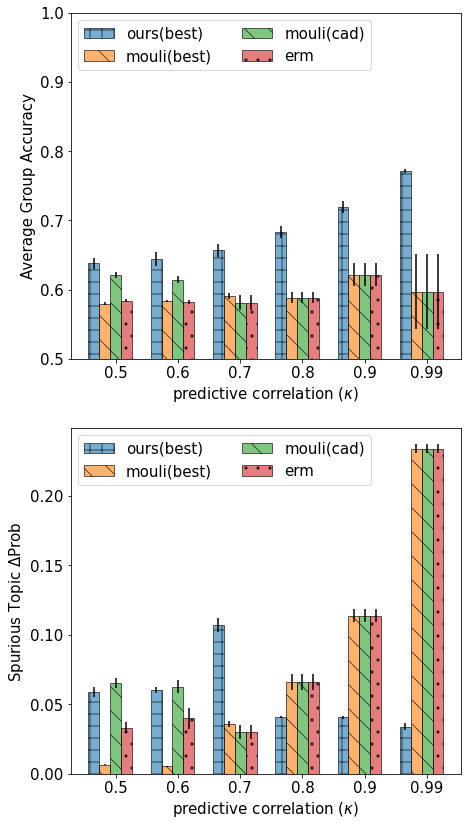

In [152]:
run_list=[13,14,15] #[10,11,12]:with initial CPD   [13,14,15]:with changed CPD
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#This will be true effect
ate_list_de_acc = [-0.01,0.1,0.2,0.38,0.49,0.65]
ate_list_de_loss = [-0.01,0.13,0.24,0.37,0.49,0.67]
# ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
# ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [0.01,0.16,0.29,0.43,0.57,0.67]
# ate_list_sel_dr_acc = [0.09,0.1,0.14,0.18,0.08,0]


#alpha and gval section using the loss
ate_list_sel_de_loss = [0.06,0.19,0.29,0.42,0.58,0.7]
# ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]




ate_sweep_list = [-1.0, -0.7, -0.5, -0.3, -0.1, 0.0, 0.1, 0.3, 0.5,  0.7, 1.0,]
ate_list_dict = dict(
    de_acc = ate_list_de_acc,
    de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    riesz_de_acc = ate_list_sel_de_acc,
#     ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    riesz_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)





reg_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({}).dcf({})/probe_metric_list.json"
# erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"
# erm_mouli_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.moulis1toy3.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).dcf({}).mvsel({})/"
inv_mouli_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.moulis1toy3.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).dcf({}).mvsel({}).telambda({})/"





mouli_topic_name="all"
atereg_topic_name="spurious"
sample=1000
num_topics=1
topic_list=["causal","spurious"]
num_epoch=20
epoch_upto=20
telambda_list = [1,10,100,1000,4000]
noise=0.0
dcf=1.0


mouli_epoch_upto=20
mouli_mvsel="loss"
mouli_run_list=[0,1,2]
mouli_telambda_erm=1000
mouli_telambda_list=[10,100,1000,0]






full_result_plotter(run_list=run_list,
                    pval_list=pval_list,
                    sample=sample,
                    noise=noise,
                    topic_list=topic_list,
                    num_topics=num_topics,
                    telambda_list=telambda_list,
                    reg_hwidth_fname_pattern=reg_fname_pattern,
                    atereg_topic_name=atereg_topic_name,
                    mouli_topic_name=mouli_topic_name,
                    inv_mouli_fname_pattern=inv_mouli_fname_pattern,
                    mouli_mvsel=mouli_mvsel,
                    mouli_run_list=mouli_run_list,
                    mouli_telambda_erm=mouli_telambda_erm,
                    mouli_telambda_list = mouli_telambda_list,
                    mouli_epoch_upto=mouli_epoch_upto,
                    epoch_upto=epoch_upto,
                    savename="p2_corr_syntext_n{}_s{}_dcf{}_epo_{}".format(noise,sample,dcf,epoch_upto),
                    dcf=1.0,
                    best_plot_mode=True,
)

## with hinge width in the same strong reg

In [29]:
run_list=[10,11]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [-0.005,0.08,0.131,0.21,0.26,0.35]
ate_list_de_loss = [-0.017,0.07,0.12,0.21,0.3,0.26]
ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
ate_list_sel_dr_acc = [0.01,0.1,0.16,0.26,0.04,0.31]


#alpha and gval section using the loss
ate_list_sel_de_loss = [-0.0001,0.001,0.004,0.01,0.06,0.11]
ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]



# ate_sweep_list = [-20.0, -10.0, -5.0, -1.0, -0.5, -0.1, 0.0, 0.1, 0.5, 1.0, 5.0,  10.0, 20.0]
ate_sweep_list = [-1.0,-0.7,-0.5,-0.3,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,]
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="spurious"
sample=1000
num_topics=1


telambda = 10 #0, 10, 100
noise=0.0
hwidth = 0.1 #0.05 0.1 0.2 0.5 1.0
reg_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"








#Getting the best result for the erm runs
# erm_pval_best_result = plot_one_result_timeline(ax=None,
#                          plot_item_list=None,
#                          run_list=run_list,
#                          pval_list=pval_list,
#                          ate_list=ate_list_dummy,
#                          fname_pattern=erm_fname_pattern.format(
#                                              "{1}",
#                                              topic_name,
#                                              sample,
#                                              noise,
#                                              "{0}",
                             
#                          ),
#                          tidx=None,
#                          title=None,
#                          no_plot_mode=True,
#                          print_best_result=False,
# )

#We have used te_lambda=0 for this experiment though!
dummy_ate_val = 0.0
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=[dummy_ate_val,]*len(pval_list),
                         fname_pattern=reg_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             noise,
                                             "{0}",
                                             "{2}",
                                             0,#telambda

                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)

#Getting the best result for every te effect in sweep list
atereg_pval_best_result={}
for ate_val in ate_sweep_list:
    atereg_pval_best_result[ate_val] = plot_one_result_timeline(ax=None,
                                                     plot_item_list=None,
                                                     run_list=run_list,
                                                     pval_list=pval_list,
                                                     ate_list=[ate_val,]*len(pval_list),
                                                     fname_pattern=reg_hwidth_fname_pattern.format(
                                                                         "{1}",
                                                                         topic_name,
                                                                         sample,
                                                                         noise,
                                                                         "{0}",
                                                                         "{2}",
                                                                         telambda,
                                                                         hwidth,

                                                     ),
                                                     tidx=None,
                                                     title=None,
                                                     no_plot_mode=True,
                                                     print_best_result=False,
    )


num_cols = num_topics*2+1 #assuming trained combined so only one indo
plt.rcParams['figure.figsize'] = [8*num_cols, 7*len(pval_list)]
fig,ax = plt.subplots(len(pval_list),num_cols)
#Plotting each of the variation for the pval
for pidx,pval in enumerate(pval_list):
    #Plotting the indo for the erm
    erm_best_indo = np.array([erm_pval_best_result[pval]["indo"]]*len(ate_sweep_list))
    erm_best_indo_std = np.array([erm_pval_best_result[pval]["indo_std"]]*len(ate_sweep_list))
    ax[pidx,0].plot(ate_sweep_list,erm_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_erm")
    ax[pidx,0].fill_between(ate_sweep_list,erm_best_indo-erm_best_indo_std,erm_best_indo+erm_best_indo_std,alpha=0.2)
    
    #Creating the varation of best indo and ood acc for each of the ate val
    atereg_best_indo = np.array([atereg_pval_best_result[ate_val][pval]["indo"] for ate_val in ate_sweep_list])
    atereg_best_indo_std = np.array([atereg_pval_best_result[ate_val][pval]["indo_std"] for ate_val in ate_sweep_list])
    ax[pidx,0].plot(ate_sweep_list,atereg_best_indo,ls="-.",marker="o",alpha=0.7,label="indo_atereg")
    ax[pidx,0].fill_between(ate_sweep_list,atereg_best_indo-atereg_best_indo_std,atereg_best_indo+atereg_best_indo_std,alpha=0.2)
    
    ax[pidx,0].set_title("pval={},indo_accuracy".format(pval))
    ax[pidx,0].set_xlabel("ate_value")
    ax[pidx,0].legend()
    ax[pidx,0].grid(True)
#     ax[pidx,0].set_ylim(0.5,0.9)
    
    #Adding the pdelta curves
    for tidx in range(0,num_cols-1,2):
        #Plotting the ondo for the erm
        erm_best_ood = np.array([erm_pval_best_result[pval]["ood{}".format((tidx)//2)]]*len(ate_sweep_list))
        erm_best_ood_std = np.array([erm_pval_best_result[pval]["ood{}_std".format((tidx)//2)]]*len(ate_sweep_list))
        ax[pidx,tidx+1].plot(ate_sweep_list,erm_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_erm")
        ax[pidx,tidx+1].fill_between(ate_sweep_list,erm_best_ood-erm_best_ood_std,erm_best_ood+erm_best_ood_std,alpha=0.2)

        #Creating the varation of best indo and ood acc for each of the ate val
        atereg_best_ood = np.array([atereg_pval_best_result[ate_val][pval]["ood{}".format((tidx)//2)] for ate_val in ate_sweep_list])
        atereg_best_ood_std = np.array([atereg_pval_best_result[ate_val][pval]["ood{}_std".format((tidx)//2)] for ate_val in ate_sweep_list])
        ax[pidx,tidx+1].plot(ate_sweep_list,atereg_best_ood,ls="-.",marker="o",alpha=0.7,label="ood_atereg")
        ax[pidx,tidx+1].fill_between(ate_sweep_list,atereg_best_ood-atereg_best_ood_std,atereg_best_ood+atereg_best_ood_std,alpha=0.2)
               
        
        yllim=0.0
        yulim=1.01
        
        #Marking the location of diffrent ate estimates
#         for ate_name, ate_list in ate_list_dict.items():
#             yval_line = np.arange(yllim,yulim,0.1)
#             xval_mark = [ate_list[pidx]]*yval_line.shape[0]
            
#             #Marking the ate as the vertical line
#             ax[pidx,tidx+1].plot(xval_mark,yval_line,ls="-.",label=ate_name)
#             ax[pidx,0].plot(xval_mark,yval_line,ls="-.",label=ate_name)
    
        ax[pidx,tidx+1].set_title("pval={},ood{}_accuracy".format(pval,(tidx)//2))
        ax[pidx,tidx+1].set_xlabel("ate_value")
        ax[pidx,tidx+1].legend()
        ax[pidx,tidx+1].grid(True)
#         ax[pidx,tidx+1].set_ylim(yllim,yulim)

        #Addign thhe plot for pdelta
        topic_pdelta_atevar = np.array([atereg_pval_best_result[ate_val][pval]["topic{}_pdelta_all".format(tidx//2)] for ate_val in ate_sweep_list])
        topic_pdelta_atevar_std = np.array([atereg_pval_best_result[ate_val][pval]["topic{}_pdelta_all_std".format(tidx//2)] for ate_val in ate_sweep_list])
        ax[pidx,tidx+2].fill_between(ate_sweep_list,topic_pdelta_atevar-topic_pdelta_atevar_std,topic_pdelta_atevar+topic_pdelta_atevar_std,alpha=0.2)
        
        ax[pidx,tidx+2].plot(ate_sweep_list,topic_pdelta_atevar,ls="-.",marker="o",alpha=0.7,label="ate_pdelta")
        ax[pidx,tidx+2].set_title("pval={},topic_pdelta".format(pval,(tidx)//2))
        ax[pidx,tidx+2].set_xlabel("ate_value")
        ax[pidx,tidx+2].legend()
        ax[pidx,tidx+2].grid(True)
    
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/nlp_toy3/nlp_logs/cad.civils2.rnum(11).topic(spurious).sample(1000).noise(0.0).pvaltsp(0.5).t0_ate(-1.0).telambda(10).hwidth(0.1)/probe_metric_list.json'

# MNIST34

## Strong regularization

mtelambda=10
{0.5: 'rotation', 0.6: 'rotation', 0.7: 'rotation', 0.8: 'rotation', 0.9: 'rotation', 0.99: 'rotation'}
mtelambda=100
{0.5: 'erm', 0.6: 'rotation', 0.7: 'rotation', 0.8: 'rotation', 0.9: 'rotation', 0.99: 'color'}
mtelambda=1000
{0.5: 'erm', 0.6: 'rotation', 0.7: 'erm', 0.8: 'rotation', 0.9: 'erm', 0.99: 'rotation'}
mtelambda=10000
{0.5: 'erm', 0.6: 'erm', 0.7: 'erm', 0.8: 'erm', 0.9: 'erm', 0.99: 'color'}
mtelambda=0
{0.5: 'erm', 0.6: 'rotation', 0.7: 'erm', 0.8: 'erm', 0.9: 'erm', 0.99: 'color'}
selected closest ate vals
method:  ate_list_de_acc
[0.0, 0.0, 0.0, 0.1, 0.1, 0.3] 

method:  ate_list_de_loss
[0.0, 0.0, 0.0, 0.1, 0.1, 0.3] 

method:  ate_list_sel_de_acc
[0.0, 0.0, -0.1, -0.1, 0.1, 0.5] 

method:  ate_list_sel_de_loss
[0.0, 0.0, 0.1, 0.1, 0.1, 0.3] 



pval=0.5
[0.7213713129361471, 0.7282280822594961, 0.7169325550397238, 0.6960316598415375]
method:ate_list_de_acc	 selected_lambda:10
[0.7213713129361471, 0.7282280822594961, 0.7169325550397238, 0.6960316598415375

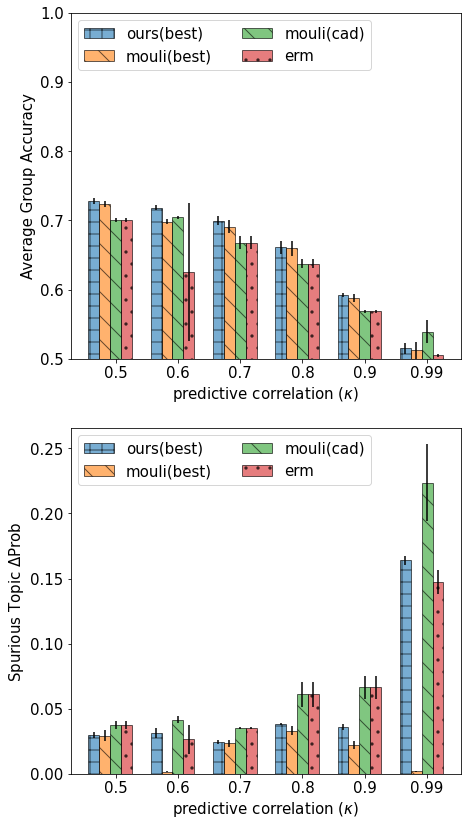

In [150]:
run_list=[0,1,2] #[10,11,12]:with initial CPD   [13,14,15]:with changed CPD
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#This will be true effect
ate_list_de_acc = [0.02,0.04,0.05,0.07,0.11,0.28]
ate_list_de_loss = [0.02,0.03,0.05,0.06,0.15,0.27]
# ate_list_dr_acc = [0.01,0.05,0.15,0.18,0.22,0.24]
# ate_list_dr_loss = [0.03,0.03,0.127,0.197,0.22,0.24]

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [0.01,-0.01,-0.1,-0.07,0.09,0.5]
ate_list_sel_de_loss = [0,-0.01,0.1,0.06,0.09,0.31]


#alpha and gval section using the loss
# ate_list_sel_de_loss = [-0.0001,0.001,0.004,0.01,0.06,0.11]
# ate_list_sel_dr_loss = [0.02,0.09,0.19,0.18,0.35,0.29]



ate_sweep_list = [-1.0, -0.7, -0.5, -0.3, -0.1, 0.0, 0.1, 0.3, 0.5, 0.7, 1.0,]
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)




reg_fname_pattern="dataset/mnist/nlp_logs/cad.mnists2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
# erm_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).erm/probe_metric_list.json"
# erm_mouli_fname_pattern="dataset/nlp_toy3/nlp_logs/cad.moulis1toy3.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).dcf({}).mvsel({})/"
inv_mouli_fname_pattern="dataset/mnist/nlp_logs/cad.moulis1mnist.rnum({}).topic({}).sample({}).noise({}).pvaltsp({}).dcf({}).mvsel({}).telambda({})/"





mouli_topic_name="all"
atereg_topic_name="rotation"
sample=10000
num_topics=1
topic_list=["color","rotation"]
num_epoch=20
epoch_upto=20
telambda_list = [1,10,100,1000,]
noise=0.3
dcf=0.0


mouli_epoch_upto=20
mouli_mvsel="loss"
mouli_run_list=[0,1,2,]
mouli_telambda_erm=1000
mouli_telambda_list=[10,100,1000,10000,0]











full_result_plotter(run_list=run_list,
                    pval_list=pval_list,
                    sample=sample,
                    noise=noise,
                    topic_list=topic_list,
                    num_topics=num_topics,
                    telambda_list=telambda_list,
                    reg_hwidth_fname_pattern=reg_fname_pattern,
                    atereg_topic_name=atereg_topic_name,
                    mouli_topic_name=mouli_topic_name,
                    inv_mouli_fname_pattern=inv_mouli_fname_pattern,
                    mouli_mvsel=mouli_mvsel,
                    mouli_run_list=mouli_run_list,
                    mouli_telambda_erm=mouli_telambda_erm,
                    mouli_telambda_list = mouli_telambda_list,
                    mouli_epoch_upto=mouli_epoch_upto,
                    epoch_upto=epoch_upto,
                    savename="p2_corr_mnist_n{}_s{}_dcf{}_epo_{}".format(noise,sample,dcf,epoch_upto),
                    dcf=dcf,
                    best_plot_mode=True,
)

# CEBAB

## Strategy 2: Ranking experiment (match with absolute TE)

# CivilComments Dataset

## Sweep on the ate effect

### Race

mtelambda=10
{0.5: 'race', 0.6: 'race', 0.7: 'race', 0.8: 'race', 0.9: 'race', 0.99: 'race'}
mtelambda=100
{0.5: 'race', 0.6: 'race', 0.7: 'race', 0.8: 'race', 0.9: 'race', 0.99: 'race'}
mtelambda=1000
{0.5: 'race', 0.6: 'race', 0.7: 'race', 0.8: 'race', 0.9: 'race', 0.99: 'race'}
mtelambda=0
{0.5: 'race', 0.6: 'race', 0.7: 'race', 0.8: 'race', 0.9: 'race', 0.99: 'race'}
selected closest ate vals
method:  ate_list_de_acc
[0.0, 0.0, 0.0, 0.0, 0.1, 0.1] 

method:  ate_list_de_loss
[0.0, 0.0, 0.0, 0.0, 0.1, 0.1] 

method:  ate_list_sel_de_acc
[0.1, 0.0, 0.0, 0.0, 0.1, 0.1] 

method:  ate_list_sel_dr_acc
[0.0, 0.0, 0.1, 0.1, 0.1, 0.1] 



pval=0.5
[0.7594322860240936, 0.7559861938158671, 0.7456329464912415, 0.7080885668595632]
method:ate_list_de_acc	 selected_lambda:1
[0.7594322860240936, 0.7559861938158671, 0.7456329464912415, 0.7080885668595632]
method:ate_list_de_loss	 selected_lambda:1
[0.7576587895552317, 0.7535905738671621, 0.7581262985865275, 0.6592423617839813]
method:ate_list_sel_

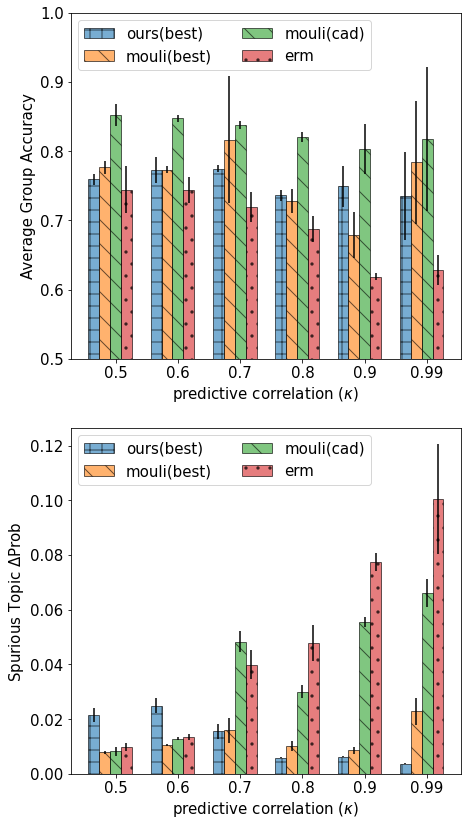

In [137]:
run_list=[0,3,4]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [0.01,0.01,0.03,0.05,0.07,0.13]
ate_list_de_loss = [0.01,0.01,0.03,0.05,0.09,0.12]
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [0.07,0.01,0,0.05,0.12,0.1]
ate_list_sel_dr_acc = [0.0,0.01,0.09,0.1,0.13,0.15]


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list = [-1.0,-0.5,-0.3,-0.1,0.0,0.1,0.3,0.5,1.0]
# ate_sweep_list =  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)




# reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
# erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"
# erm_mouli_fname_pattern = "dataset/civilcomments/nlp_logs/cad.moulis1civil.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({})/"
inv_mouli_fname_pattern = "dataset/civilcomments/nlp_logs/cad.moulis1civil.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({}).telambda({})/"




mouli_topic_name="race"
atereg_topic_name=mouli_topic_name
sample=5000
num_topics=1
topic_list=["race"]
num_epoch=20
epoch_upto=5
telambda_list = [1,10,100,1000,]
noise=0.0


mouli_epoch_upto=20
mouli_mvsel="loss"
mouli_run_list=[0,1,2]
mouli_telambda_erm=1000
mouli_telambda_list=[10,100,1000,0]






full_result_plotter(run_list=run_list,
                    pval_list=pval_list,
                    sample=sample,
                    noise=noise,
                    topic_list=topic_list,
                    num_topics=num_topics,
                    telambda_list=telambda_list,
                    reg_hwidth_fname_pattern=reg_fname_pattern,
                    atereg_topic_name=atereg_topic_name,
                    mouli_topic_name=mouli_topic_name,
                    inv_mouli_fname_pattern=inv_mouli_fname_pattern,
                    mouli_mvsel=mouli_mvsel,
                    mouli_run_list=mouli_run_list,
                    mouli_telambda_erm=mouli_telambda_erm,
                    mouli_telambda_list = mouli_telambda_list,
                    mouli_epoch_upto=mouli_epoch_upto,
                    epoch_upto=epoch_upto,
                    savename="p2_corr_civil_n{}_s{}_dcf{}_epo_{}".format(noise,sample,dcf,epoch_upto),
                    dcf=dcf,
                    best_plot_mode=True,
)

## Weaker regularization with width

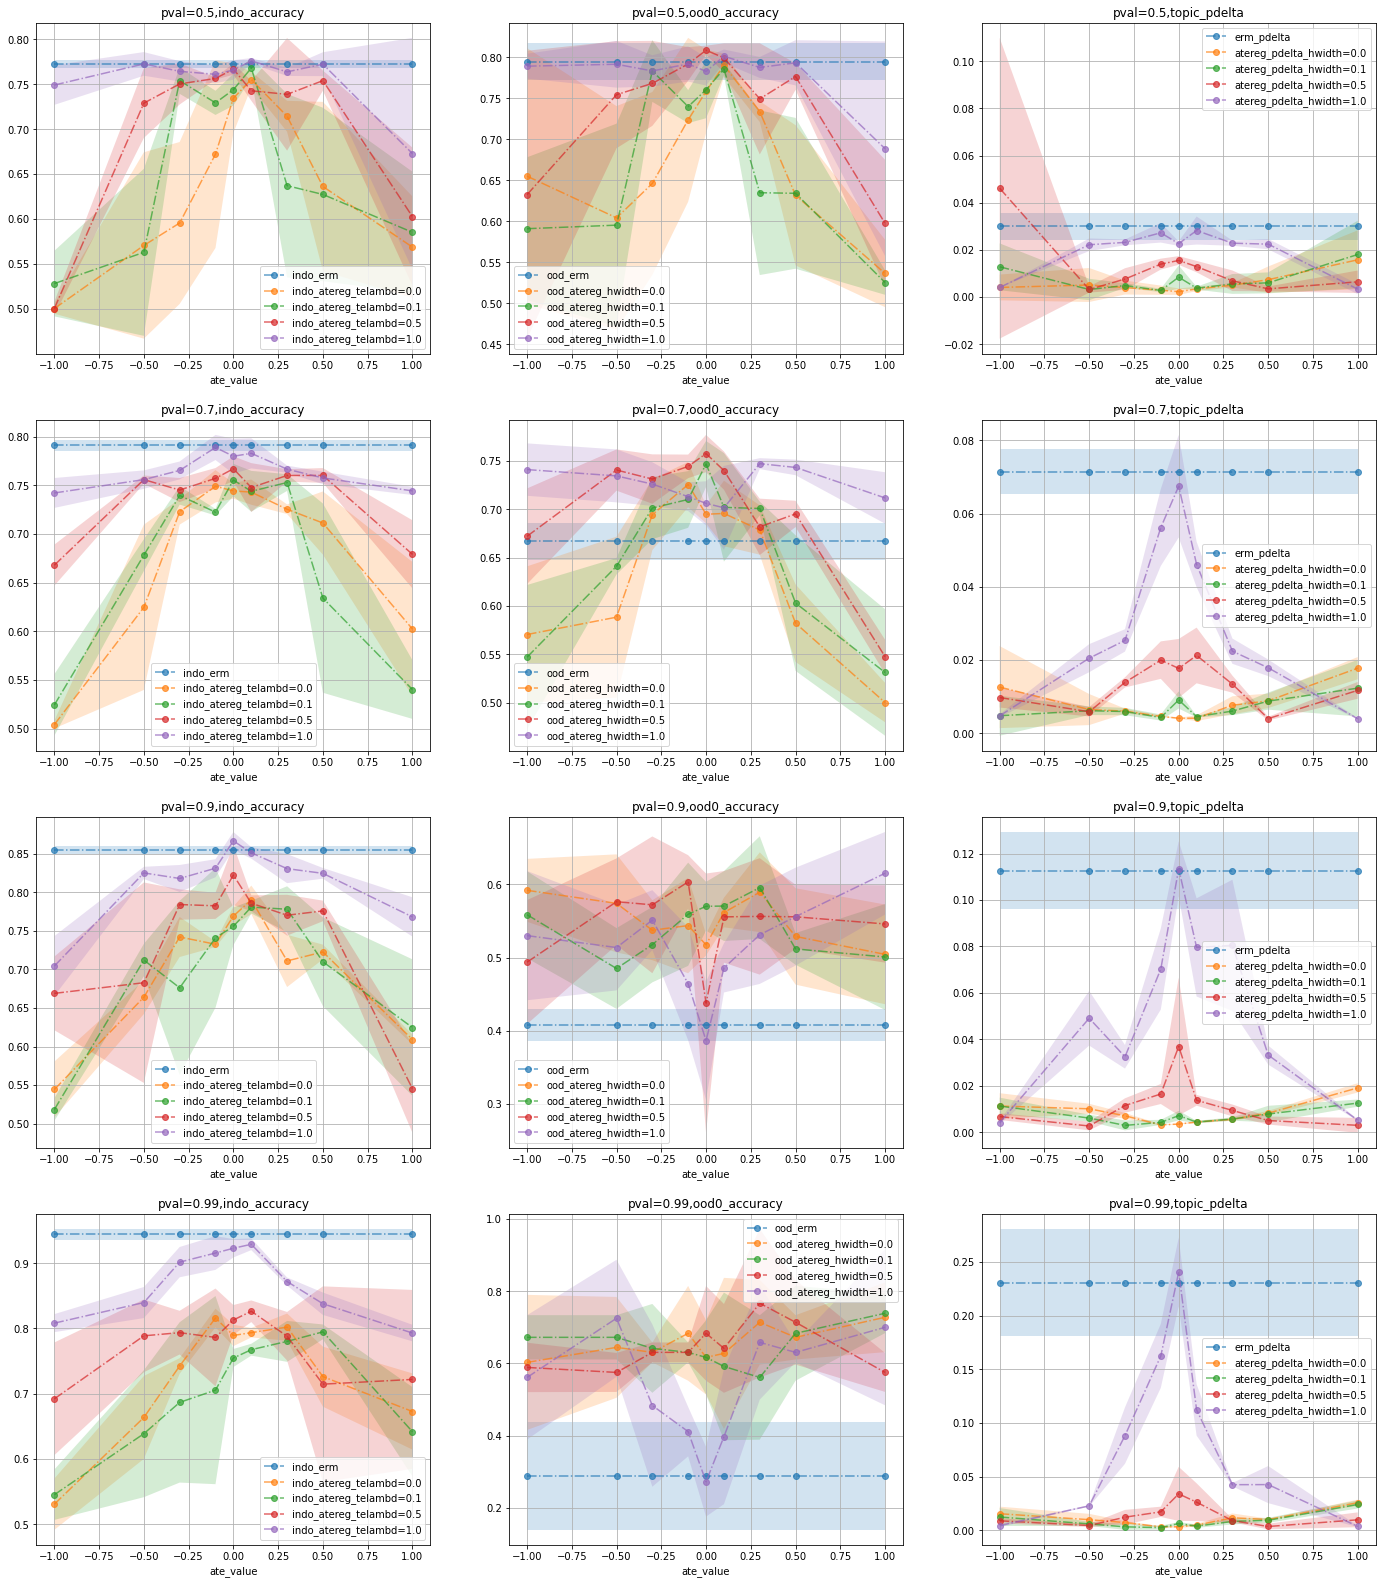

In [75]:
run_list=[0,1,2]
pval_list=[0.5,0.7,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = []
ate_list_de_loss = []
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = []
ate_list_sel_dr_acc = []


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list =  [-1.0,-0.5,-0.3,-0.1,0.0,0.1,0.3,0.5,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="race"
sample=5000
num_topics=1


telambda_list = [1,10,100,1000]
telambda=1000
noise=0.0
hwidth=0.1 #0.1 0.5 1.0
hwidth_list = [0.0,0.1,0.5,1.0]

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)



#Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for hwidth in hwidth_list:
    for ate_val in ate_sweep_list:
        if hwidth==0.0 and telambda<5:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )
        else:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,
                                                                                 hwidth,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )


            
            
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 hpname="hwidth",
)

### Gender

mtelambda=10
{0.5: 'gender', 0.6: 'gender', 0.7: 'gender', 0.8: 'gender', 0.9: 'gender', 0.99: 'gender'}
mtelambda=100
{0.5: 'gender', 0.6: 'gender', 0.7: 'gender', 0.8: 'gender', 0.9: 'gender', 0.99: 'gender'}
mtelambda=1000
{0.5: 'gender', 0.6: 'gender', 0.7: 'gender', 0.8: 'gender', 0.9: 'gender', 0.99: 'gender'}
mtelambda=0
{0.5: 'gender', 0.6: 'gender', 0.7: 'gender', 0.8: 'gender', 0.9: 'gender', 0.99: 'gender'}
selected closest ate vals
method:  ate_list_de_acc
[0.0, 0.0, 0.0, 0.0, 0.1, 0.1] 

method:  ate_list_de_loss
[0.0, 0.0, 0.0, 0.0, 0.1, 0.1] 

method:  ate_list_sel_de_acc
[0.1, 0.0, 0.0, 0.0, 0.1, 0.1] 

method:  ate_list_sel_dr_acc
[0.0, 0.0, 0.1, 0.1, 0.1, 0.1] 



pval=0.5
[0.8150946795940399, 0.8119117915630341, 0.793592244386673, 0.7122433483600616]
method:ate_list_de_acc	 selected_lambda:1
[0.8150946795940399, 0.8119117915630341, 0.793592244386673, 0.7122433483600616]
method:ate_list_de_loss	 selected_lambda:1
[0.8154662648836771, 0.8151300648848215, 0.803086241086

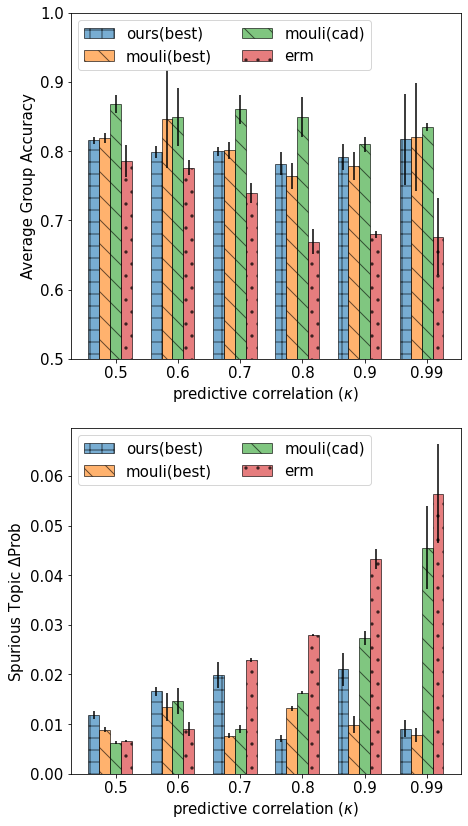

In [141]:
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [0.01,0.01,0.03,0.05,0.07,0.13]
ate_list_de_loss = [0.01,0.01,0.03,0.05,0.09,0.12]
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [0.07,0.01,0,0.05,0.12,0.1]
ate_list_sel_dr_acc = [0.0,0.01,0.09,0.1,0.13,0.15]


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list = [-1.0,-0.5,-0.1,0.0,0.1,0.3,0.5,1.0] #we also have 0.9 availabel to us for telambda upto 10k
# ate_sweep_list =  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)





# reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
# erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"
# erm_mouli_fname_pattern = "dataset/civilcomments/nlp_logs/cad.moulis1civil.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({})/"
inv_mouli_fname_pattern = "dataset/civilcomments/nlp_logs/cad.moulis1civil.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({}).telambda({})/"




mouli_topic_name="gender"
atereg_topic_name=mouli_topic_name
sample=5000
num_topics=1
topic_list=["gender"]
num_epoch=20
epoch_upto=20
telambda_list = [1,10,100,1000,]
noise=0.0


mouli_epoch_upto=20
mouli_mvsel="loss"
mouli_run_list=[0,1,2]
mouli_telambda_erm=1000
mouli_telambda_list=[10,100,1000,0]





full_result_plotter(run_list=run_list,
                    pval_list=pval_list,
                    sample=sample,
                    noise=noise,
                    topic_list=topic_list,
                    num_topics=num_topics,
                    telambda_list=telambda_list,
                    reg_hwidth_fname_pattern=reg_fname_pattern,
                    atereg_topic_name=atereg_topic_name,
                    mouli_topic_name=mouli_topic_name,
                    inv_mouli_fname_pattern=inv_mouli_fname_pattern,
                    mouli_mvsel=mouli_mvsel,
                    mouli_run_list=mouli_run_list,
                    mouli_telambda_erm=mouli_telambda_erm,
                    mouli_telambda_list = mouli_telambda_list,
                    mouli_epoch_upto=mouli_epoch_upto,
                    epoch_upto=epoch_upto,
                    savename="p2_corr_civil_n{}_s{}_dcf{}_epo_{}".format(noise,sample,dcf,epoch_upto),
                    dcf=dcf,
                    best_plot_mode=True,
)

## Weaker point wise te regularization

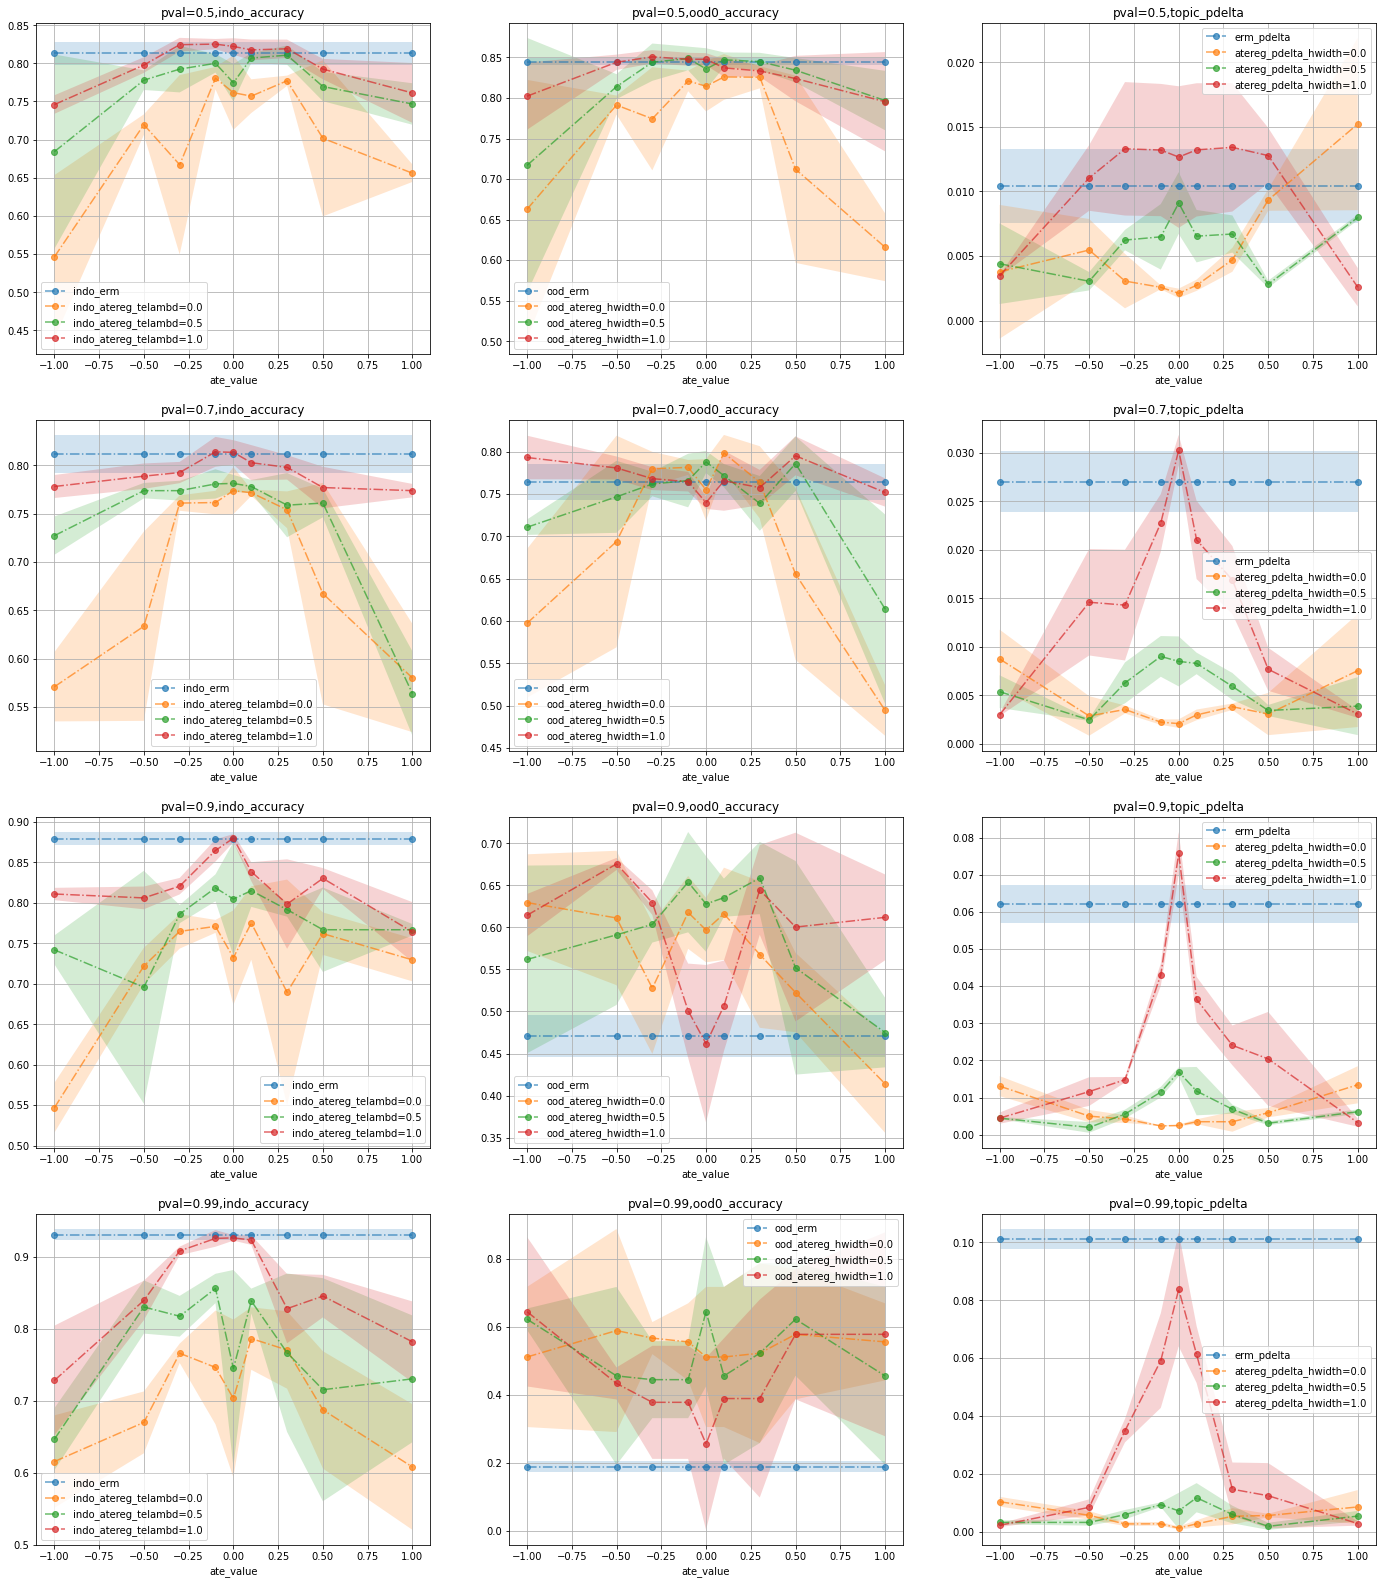

In [84]:
run_list=[0,1,2]
pval_list=[0.5,0.7,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = []
ate_list_de_loss = []
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = []
ate_list_sel_dr_acc = []


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list =  [-1.0,-0.5,-0.3,-0.1,0.0,0.1,0.3,0.5,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="religion"
sample=4000
num_topics=1


telambda_list = [1,10,100,1000]
telambda=1000
noise=0.0
hwidth=0.1 #0.1 0.5 1.0
hwidth_list = [0.0,0.5,1.0]

reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)



#Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for hwidth in hwidth_list:
    for ate_val in ate_sweep_list:
        if hwidth==0.0 and telambda<5:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )
        else:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,
                                                                                 hwidth,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )


            
            
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 hpname="hwidth",
)

## Religion

mtelambda=10
{0.5: 'religion', 0.6: 'religion', 0.7: 'religion', 0.8: 'religion', 0.9: 'religion', 0.99: 'religion'}
mtelambda=100
{0.5: 'religion', 0.6: 'religion', 0.7: 'religion', 0.8: 'religion', 0.9: 'religion', 0.99: 'religion'}
mtelambda=1000
{0.5: 'religion', 0.6: 'religion', 0.7: 'religion', 0.8: 'religion', 0.9: 'religion', 0.99: 'religion'}
mtelambda=0
{0.5: 'religion', 0.6: 'religion', 0.7: 'religion', 0.8: 'religion', 0.9: 'religion', 0.99: 'religion'}
selected closest ate vals
method:  ate_list_de_acc
[0.0, 0.0, 0.0, 0.0, 0.1, 0.1] 

method:  ate_list_de_loss
[0.0, 0.0, 0.0, 0.0, 0.1, 0.1] 

method:  ate_list_sel_de_acc
[0.1, 0.0, 0.0, 0.0, 0.1, 0.1] 

method:  ate_list_sel_dr_acc
[0.0, 0.0, 0.1, 0.1, 0.1, 0.1] 



pval=0.5
[0.8202148278554281, 0.8203329145908356, 0.8148059745629629, 0.7693643669287363]
method:ate_list_de_acc	 selected_lambda:10
[0.8202148278554281, 0.8203329145908356, 0.8148059745629629, 0.7693643669287363]
method:ate_list_de_loss	 selected_lambda:10
[0.

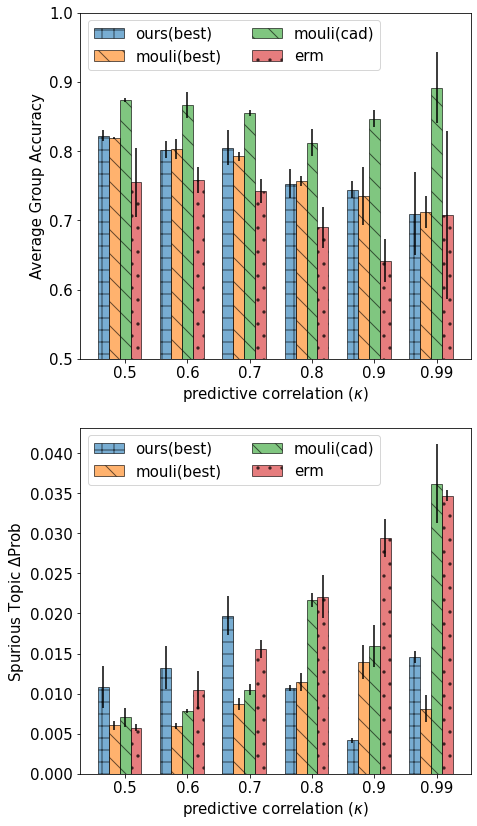

In [143]:
run_list=[1,2,3]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [0.01,0.01,0.03,0.05,0.07,0.13]
ate_list_de_loss = [0.01,0.01,0.03,0.05,0.09,0.12]
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [0.07,0.01,0,0.05,0.12,0.1]
ate_list_sel_dr_acc = [0.0,0.01,0.09,0.1,0.13,0.15]


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list = [-1.0,-0.5,-0.1,0.0,0.1,0.3,0.5,1.0] #we also have 0.9 availabel to us for telambda upto 10k
# ate_sweep_list =  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)







# reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
# erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"
# erm_mouli_fname_pattern = "dataset/civilcomments/nlp_logs/cad.moulis1civil.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({})/"
inv_mouli_fname_pattern = "dataset/civilcomments/nlp_logs/cad.moulis1civil.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({}).telambda({})/"


mouli_topic_name="religion"
atereg_topic_name=mouli_topic_name
sample=4000
num_topics=1
topic_list=["religion"]
num_epoch=20
epoch_upto=20
telambda_list = [1,10,100,1000,]
noise=0.0


mouli_epoch_upto=20
mouli_mvsel="loss"
mouli_run_list=[0,1,2]
mouli_telambda_erm=1000
mouli_telambda_list=[10,100,1000,0]






full_result_plotter(run_list=run_list,
                    pval_list=pval_list,
                    sample=sample,
                    noise=noise,
                    topic_list=topic_list,
                    num_topics=num_topics,
                    telambda_list=telambda_list,
                    reg_hwidth_fname_pattern=reg_fname_pattern,
                    atereg_topic_name=atereg_topic_name,
                    mouli_topic_name=mouli_topic_name,
                    inv_mouli_fname_pattern=inv_mouli_fname_pattern,
                    mouli_mvsel=mouli_mvsel,
                    mouli_run_list=mouli_run_list,
                    mouli_telambda_erm=mouli_telambda_erm,
                    mouli_telambda_list = mouli_telambda_list,
                    mouli_epoch_upto=mouli_epoch_upto,
                    epoch_upto=epoch_upto,
                    savename="p2_corr_civil_n{}_s{}_dcf{}_epo_{}".format(noise,sample,dcf,epoch_upto),
                    dcf=dcf,
                    best_plot_mode=True,
)

# AAE dataset + gptcf

## Sweep on the treatment effect

mtelambda=10
{0.5: 'race', 0.6: 'race', 0.7: 'race', 0.8: 'race', 0.9: 'race', 0.99: 'race'}
mtelambda=100
{0.5: 'race', 0.6: 'race', 0.7: 'race', 0.8: 'race', 0.9: 'race', 0.99: 'race'}
mtelambda=1000
{0.5: 'erm', 0.6: 'erm', 0.7: 'erm', 0.8: 'erm', 0.9: 'erm', 0.99: 'erm'}
mtelambda=0
{0.5: 'race', 0.6: 'race', 0.7: 'race', 0.8: 'race', 0.9: 'race', 0.99: 'race'}
selected closest ate vals
method:  ate_list_de_acc
[0.0, 0.1, 0.1, 0.1, 0.3, 0.3] 

method:  ate_list_de_loss
[0.0, 0.1, 0.1, 0.1, 0.3, 0.3] 

method:  ate_list_sel_de_acc
[0.0, 0.1, 0.0, 0.0, 0.1, 0.3] 

method:  ate_list_sel_dr_acc
[0.0, 0.1, 0.1, 0.3, 0.0, 0.3] 



pval=0.5
[0.6905026137828827, 0.6786272426446279, 0.5028980771700541, 0.5039576590061188]
method:ate_list_de_acc	 selected_lambda:1
[0.6905026137828827, 0.6786272426446279, 0.5028980771700541, 0.5039576590061188]
method:ate_list_de_loss	 selected_lambda:1
[0.6905026137828827, 0.6786272426446279, 0.5028980771700541, 0.5039576590061188]
method:ate_list_sel_de_acc

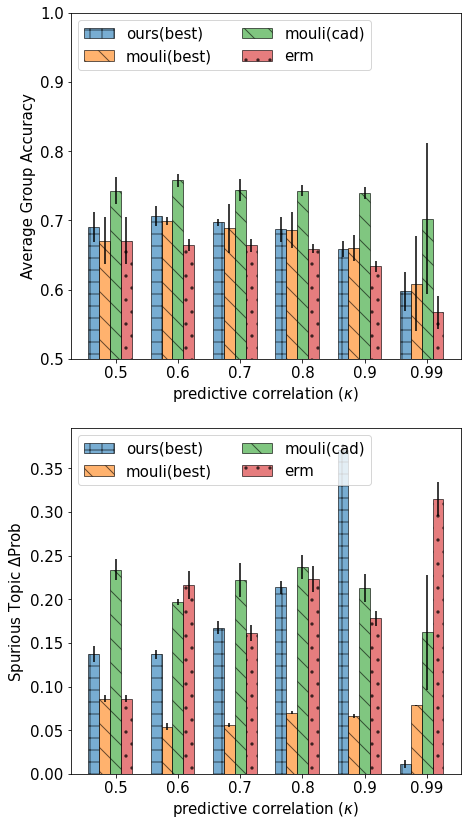

In [149]:
run_list=[0,1,2]
pval_list=[0.5,0.6,0.7,0.8,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = [0.006,0.087,0.12,0.193,0.24,0.38]
ate_list_de_loss = [0.009,0.085,0.13,0.189,0.24,0.38]
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = [-0.0002,0.124,0.0006,0.008,0.06,0.35]
ate_list_sel_dr_acc = [0.01,0.1,0.16,0.26,0.04,0.31]


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list = [-1.0,-0.5,-0.1,0.0,0.1,0.3,0.5,1.0]
# ate_sweep_list = [-10.0,-1.0,-0.5,-0.1] + [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] + [2.0,3.0,5.0,10.0]
# ate_sweep_list = [-50.0,-10.0,-1.0,-0.5,-0.1] + [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] + [2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
#     ate_list_dr_acc = ate_list_dr_acc,
#     ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
#     ate_list_sel_de_loss = ate_list_sel_de_loss,
#     ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)







# reg_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({})/probe_metric_list.json"
reg_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
# erm_fname_pattern="dataset/civilcomments/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"
# erm_mouli_fname_pattern = "dataset/civilcomments/nlp_logs/cad.moulis1civil.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({})/"
inv_mouli_fname_pattern = "dataset/twitter_aae_sentiment_race/nlp_logs/cad.moulis1aae.rnum({}).topic({}).sample({}).noise({}).pval({}).mvsel({}).telambda({})/"




mouli_topic_name="race"
atereg_topic_name=mouli_topic_name
sample=10000
num_topics=1
topic_list=["race"]
num_epoch=20
epoch_upto=5
telambda_list = [1,10,100,1000,]
noise=0.0


mouli_epoch_upto=5
mouli_mvsel="loss"
mouli_run_list=[0,1,2]
mouli_telambda_erm=1000
mouli_telambda_list=[10,100,1000,0]









full_result_plotter(run_list=run_list,
                    pval_list=pval_list,
                    sample=sample,
                    noise=noise,
                    topic_list=topic_list,
                    num_topics=num_topics,
                    telambda_list=telambda_list,
                    reg_hwidth_fname_pattern=reg_fname_pattern,
                    atereg_topic_name=atereg_topic_name,
                    mouli_topic_name=mouli_topic_name,
                    inv_mouli_fname_pattern=inv_mouli_fname_pattern,
                    mouli_mvsel=mouli_mvsel,
                    mouli_run_list=mouli_run_list,
                    mouli_telambda_erm=mouli_telambda_erm,
                    mouli_telambda_list = mouli_telambda_list,
                    mouli_epoch_upto=mouli_epoch_upto,
                    epoch_upto=epoch_upto,
                    savename="p2_corr_civil_n{}_s{}_dcf{}_epo_{}".format(noise,sample,dcf,epoch_upto),
                    dcf=dcf,
                    best_plot_mode=True,
)

## Weaker point wise regularization using width

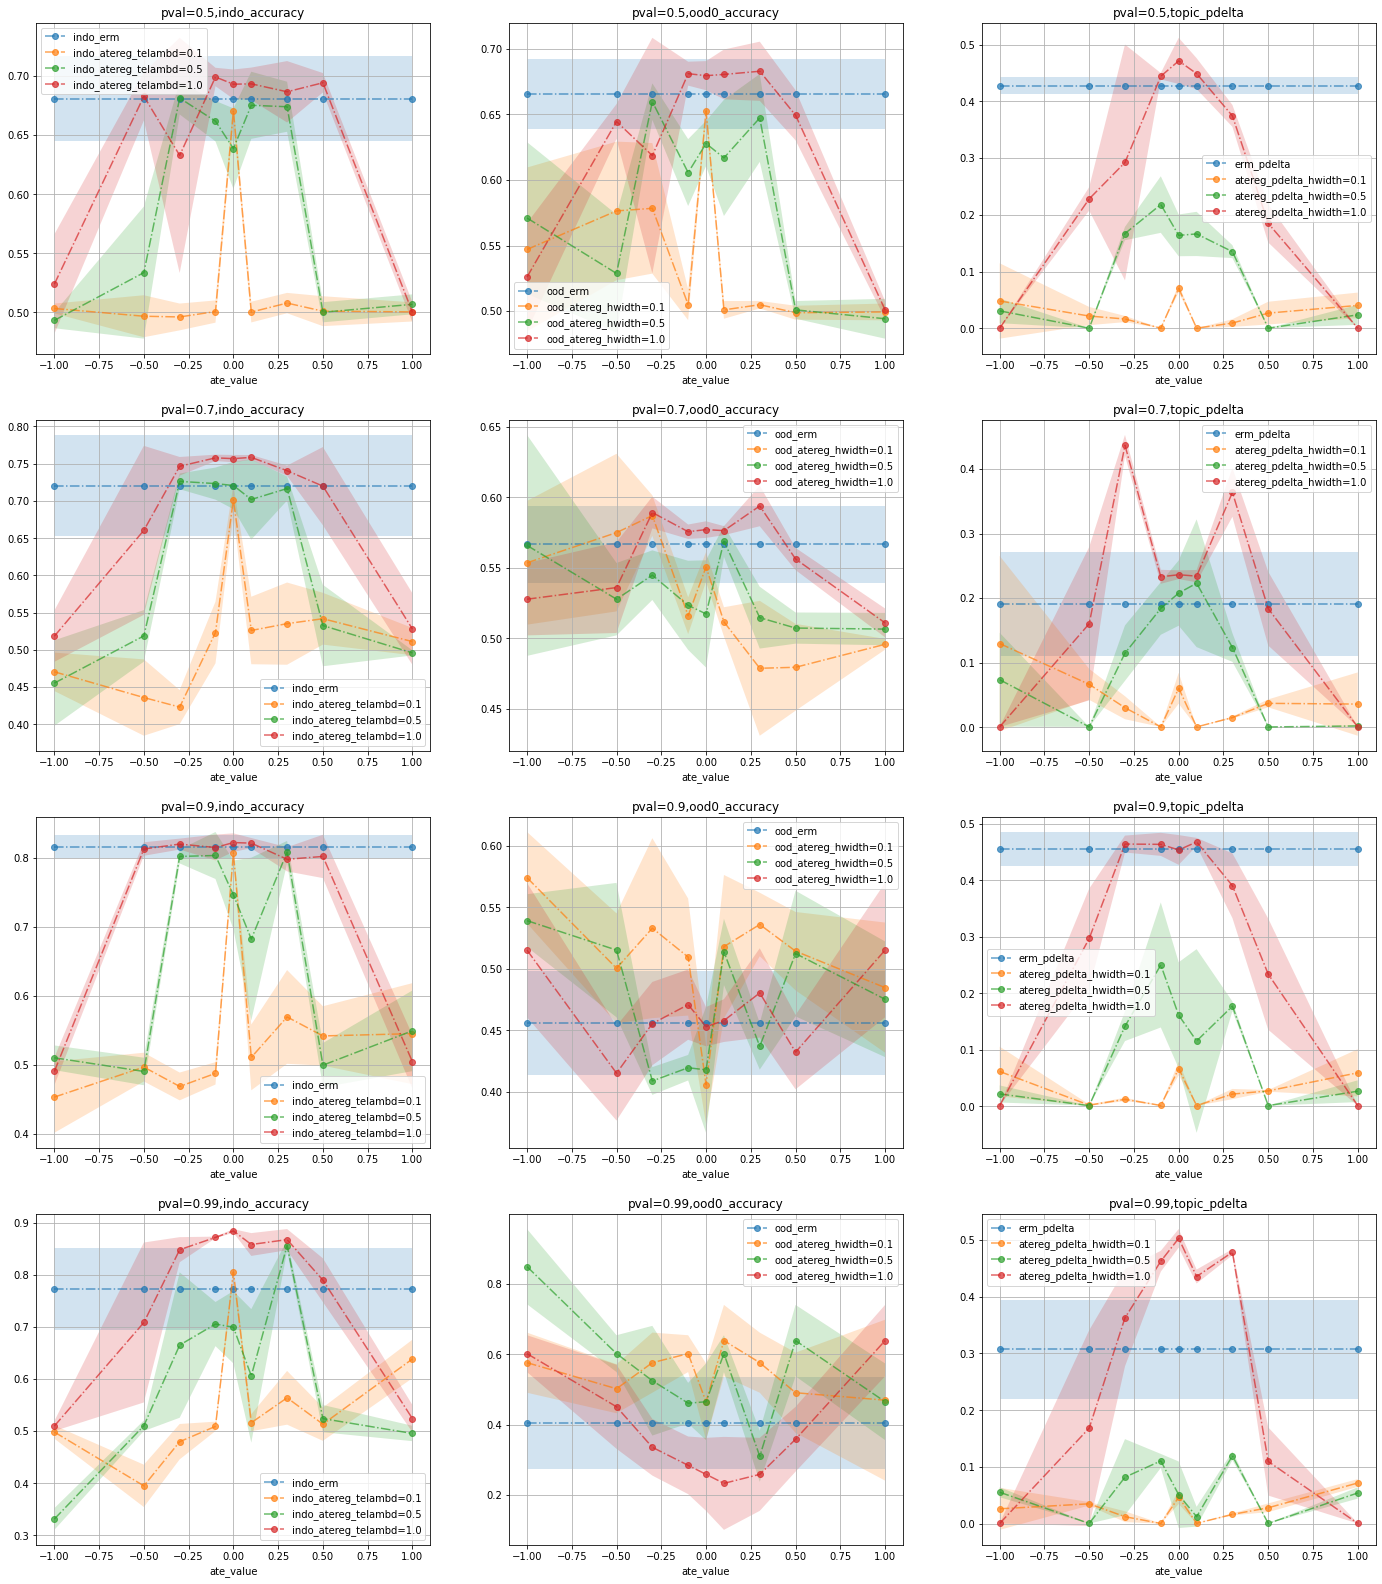

In [89]:
run_list=[0,1,2]
pval_list=[0.5,0.7,0.9,0.99]
ate_list_dummy = [None]*len(pval_list)
ate_list_true = [0.0]*len(pval_list) #correct one

#The ate: no alpha and gval selection
ate_list_de_acc = []
ate_list_de_loss = []
ate_list_dr_acc = []
ate_list_dr_loss = []

#alpha and gval selection using the gval accuracy
ate_list_sel_de_acc = []
ate_list_sel_dr_acc = []


#alpha and gval section using the loss
ate_list_sel_de_loss = []
ate_list_sel_dr_loss = []


ate_sweep_list =  [-1.0,-0.5,-0.3,-0.1,0.0,0.1,0.3,0.5,1.0]
# ate_sweep_list =  [-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0]
# ate_sweep_list =  [-50.0,-10.0,-1.0,-0.5,-0.1] +  [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] +[2.0,3.0,5.0,10.0,50.0,100.0]
#Adding the ate to mark in the sweep plot
ate_list_dict = dict(
    ate_list_de_acc = ate_list_de_acc,
    ate_list_de_loss = ate_list_de_loss,
    ate_list_dr_acc = ate_list_dr_acc,
    ate_list_dr_loss = ate_list_dr_loss,
    ate_list_sel_de_acc = ate_list_sel_de_acc,
    ate_list_sel_dr_acc = ate_list_sel_dr_acc,
    ate_list_sel_de_loss = ate_list_sel_de_loss,
    ate_list_sel_dr_loss = ate_list_sel_dr_loss,
)


topic_name="race"
sample=10000
num_topics=1


telambda_list = [1,10,100,1000]
telambda=10000
noise=0.0
hwidth=0.5 #0.1 0.5 1.0
hwidth_list = [0.1,0.5,1.0]

reg_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
reg_hwidth_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).noise({}).pval({}).t0_ate({}).telambda({}).hwidth({})/probe_metric_list.json"
erm_fname_pattern="dataset/twitter_aae_sentiment_race/nlp_logs/cad.civils2.rnum({}).topic({}).sample({}).pval({}).erm/probe_metric_list.json"

#Getting the best result for the erm runs
erm_pval_best_result = plot_one_result_timeline(ax=None,
                         plot_item_list=None,
                         run_list=run_list,
                         pval_list=pval_list,
                         ate_list=ate_list_dummy,
                         fname_pattern=erm_fname_pattern.format(
                                             "{1}",
                                             topic_name,
                                             sample,
                                             "{0}",
                             
                         ),
                         tidx=None,
                         title=None,
                         no_plot_mode=True,
                         print_best_result=False,
)



#Getting the best result for every te effect in sweep list
num_cols = num_topics*2+1 #assuming trained combined so only one indo
atereg_pval_best_result=defaultdict(dict)
for hwidth in hwidth_list:
    for ate_val in ate_sweep_list:
        if hwidth==0.0 and telambda<5:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )
        else:
            atereg_pval_best_result[hwidth][ate_val] = plot_one_result_timeline(ax=None,
                                                             plot_item_list=None,
                                                             run_list=run_list,
                                                             pval_list=pval_list,
                                                             ate_list=[ate_val,]*len(pval_list),
                                                             fname_pattern=reg_hwidth_fname_pattern.format(
                                                                                 "{1}",
                                                                                 topic_name,
                                                                                 sample,
                                                                                 noise,
                                                                                 "{0}",
                                                                                 "{2}",
                                                                                 telambda,
                                                                                 hwidth,

                                                             ),
                                                             tidx=None,
                                                             title=None,
                                                             no_plot_mode=True,
                                                             print_best_result=False,
            )


            
            
plot_ateval_performance_spectrum(num_cols=num_cols,
                                 pval_list=pval_list,
                                 erm_pval_best_result=erm_pval_best_result,
                                 atereg_pval_best_result=atereg_pval_best_result,
                                 hpname="hwidth",
)